In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn import tree

In [ ]:
data = pd.read_parquet('data.parquet')
data

,client_identifier,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,...,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
0,SSWAG:1101,No,No,15,Female,No,DSL,No,Yes,Yes,...,Electronic check,Yes,No,Month-to-month,Yes,0,51.10,No,711.15,No
1,QNXIQ:6859,Yes,Yes,72,Female,Yes,Fiber optic,Yes,Yes,Yes,...,Bank transfer (automatic),Yes,Yes,Two year,Yes,0,113.10,Yes,8248.5,No
2,SVLTV:2931,Yes,No,40,Male,Yes,Fiber optic,Yes,Yes,Yes,...,Credit card (automatic),Yes,Yes,Month-to-month,Yes,0,110.10,Yes,4469.1,No
3,CHOPY:5110,Yes,Yes,60,Female,No,DSL,No,No,No phone service,...,Electronic check,No,Yes,Two year,No,0,53.60,No,3237.05,No
4,IEAXF:3704,Yes,No,72,Female,Yes,DSL,Yes,No,No phone service,...,Credit card (automatic),No,No,Two year,Yes,0,53.65,Yes,3784,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,WJZUE:4695,Yes,Yes,2,Female,No,Fiber optic,No,Yes,Yes,...,Electronic check,Yes,No,Month-to-month,No,1,88.55,No,179.25,Yes
6296,XLSGQ:3617,Yes,Yes,66,Female,Yes,Fiber optic,Yes,Yes,Yes,...,Bank transfer (automatic),No,Yes,Two year,Yes,0,109.25,No,7082.5,No
6297,UGBTK:9359,Yes,Yes,67,Female,No,DSL,No,Yes,No,...,Bank transfer (automatic),Yes,Yes,One year,No,0,72.35,Yes,4991.5,No
6298,BZVLZ:9928,Yes,Yes,12,Female,No,DSL,No,No,No phone service,...,Mailed check,No,Yes,Two year,No,0,49.85,Yes,552.1,No


## Here are several functions used in this project for data manipulations.
#### 1). to_num function converts data into numeric, drops unneeded columns and replace uncertain values into "NaN";
#### 2). split_data function gets data and splits it into train and test and returns dataframe for each part of data.
#### 3). scale_manually function scales X_train by its values and scales X_test used "min" and "max" of X_train.

In [ ]:
def to_num(filled_data):
    #==================================================================================
    has_movie_streaming = filled_data['has_movie_streaming'].value_counts()
    condition_0 = [filled_data['has_movie_streaming'] == has_movie_streaming.index[0],
                   filled_data['has_movie_streaming'] == has_movie_streaming.index[1]]
    choice_0 = [0,
                1]
    filled_data['has_movie_streaming'] = np.select(condition_0, choice_0, default = 2)
    #==================================================================================
    has_device_protection = filled_data['has_device_protection'].value_counts()
    condition_1 = [filled_data['has_device_protection'] == has_device_protection.index[0],
                   filled_data['has_device_protection'] == has_device_protection.index[1]]
    choice_1 = [0,
                1]
    filled_data['has_device_protection'] = np.select(condition_1, choice_1, default = 2)
    #==================================================================================
    gender = filled_data['gender'].value_counts()
    condition_2 = [filled_data['gender'] == gender.index[0]]
    choice_2 = [0]
    filled_data['gender'] = np.select(condition_2, choice_2, default = 1)
    #==================================================================================
    has_dependents = filled_data['has_dependents'].value_counts()
    condition_3 = [filled_data['has_dependents'] == has_dependents.index[0]]
    choice_3 = [0]
    filled_data['has_dependents'] = np.select(condition_3, choice_3, default = 1)
    #==================================================================================
    has_internet_service = filled_data['has_internet_service'].value_counts()
    condition_4 = [filled_data['has_internet_service'] == has_internet_service.index[0],
                   filled_data['has_internet_service'] == has_internet_service.index[1]]
    choice_4 = [0,
                1]
    filled_data['has_internet_service'] = np.select(condition_4, choice_4, default = 2)
    #==================================================================================
    has_online_backup = filled_data['has_online_backup'].value_counts()
    condition_5 = [filled_data['has_online_backup'] == has_online_backup.index[0],
                   filled_data['has_online_backup'] == has_online_backup.index[1]]
    choice_5 = [0,
                1]
    filled_data['has_online_backup'] = np.select(condition_5, choice_5, default = 2)
    #==================================================================================
    has_phone_service = filled_data['has_phone_service'].value_counts()
    condition_6 = [filled_data['has_phone_service'] == has_phone_service.index[0]]
    choice_6 = [0]
    filled_data['has_phone_service'] = np.select(condition_6, choice_6, default = 1)
    #==================================================================================
    multiple_phone_lines = filled_data['multiple_phone_lines'].value_counts()
    condition_7 = [filled_data['multiple_phone_lines'] == multiple_phone_lines.index[0],
                   filled_data['multiple_phone_lines'] == multiple_phone_lines.index[1]]
    choice_7 = [0,
                1]
    filled_data['multiple_phone_lines'] = np.select(condition_7, choice_7, default = 2)
    #==================================================================================
    has_tv_streaming = filled_data['has_tv_streaming'].value_counts()
    condition_8 = [filled_data['has_tv_streaming'] == has_tv_streaming.index[0],
                   filled_data['has_tv_streaming'] == has_tv_streaming.index[1]]
    choice_8 = [0,
                1]
    filled_data['has_tv_streaming'] = np.select(condition_8, choice_8, default = 2)
    #==================================================================================
    payment_method = filled_data['payment_method'].value_counts()
    condition_9 = [filled_data['payment_method'] == payment_method.index[0],
                   filled_data['payment_method'] == payment_method.index[1],
                   filled_data['payment_method'] == payment_method.index[2]]
    choice_9 = [0,
                1,
                2]
    filled_data['payment_method'] = np.select(condition_9, choice_9, default = 3)
    #==================================================================================
    has_paperless_billing = filled_data['has_paperless_billing'].value_counts()
    condition_10 = [filled_data['has_paperless_billing'] == has_paperless_billing.index[0]]
    choice_10 = [0]
    filled_data['has_paperless_billing'] = np.select(condition_10, choice_10, default = 1)
    #==================================================================================
    has_web_security = filled_data['has_web_security'].value_counts()
    condition_11 = [filled_data['has_web_security'] == has_web_security.index[0],
                   filled_data['has_web_security'] == has_web_security.index[1]]
    choice_11 = [0,
                1]
    filled_data['has_web_security'] = np.select(condition_11, choice_11, default = 2)
    #==================================================================================
    agreement_type = filled_data['agreement_type'].value_counts()
    condition_12 = [filled_data['agreement_type'] == agreement_type.index[0],
                   filled_data['agreement_type'] == agreement_type.index[1]]
    choice_12 = [0,
                1]
    filled_data['agreement_type'] = np.select(condition_12, choice_12, default = 2)
    #==================================================================================
    relationship_status = filled_data['relationship_status'].value_counts()
    condition_13 = [filled_data['relationship_status'] == relationship_status.index[0]]
    choice_13 = [0]
    filled_data['relationship_status'] = np.select(condition_13, choice_13, default = 1)
    #==================================================================================
    has_tech_help = filled_data['has_tech_help'].value_counts()
    condition_14 = [filled_data['has_tech_help'] == has_tech_help.index[0],
                   filled_data['has_tech_help'] == has_tech_help.index[1]]
    choice_14 = [0,
                1]
    filled_data['has_tech_help'] = np.select(condition_14, choice_14, default = 2)
    #==================================================================================
    churn = filled_data['churn'].value_counts()
    condition_15 = [filled_data['churn'] == churn.index[0]]
    choice_15 = [0]
    filled_data['churn'] = np.select(condition_15, choice_15, default = 1)
    filled_data = filled_data.drop(['client_identifier'], axis = 1)
    #==================================================================================
    filled_data['cumulative_cost'] = filled_data['cumulative_cost'].replace(' ', np.nan)
    filled_data['cumulative_cost'] = filled_data['cumulative_cost'].astype(float)
    return filled_data

In [ ]:
def split_data(data):
    train_size = 0.8
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size)
    return pd.DataFrame(X_train), pd.DataFrame(X_test), pd.DataFrame(y_train), pd.DataFrame(y_test)

In [ ]:
def scale_manually(X_train, X_test):
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    X_train.columns = data.columns[1:-1]
    X_test.columns = data.columns[1:-1]

    scaled_data_train = pd.DataFrame()
    for column in X_train.columns:
        min_val = np.min(X_train[column])
        max_val = np.max(X_train[column])
        scaled_data_train[column] = (X_train[column] - min_val) / (max_val - min_val)

    scaled_test_data = pd.DataFrame()
    for column in X_test.columns:
        min_val = np.min(X_train[column])
        max_val = np.max(X_train[column])
        scaled_test_data[column] = (X_test[column] - min_val) / (max_val - min_val)
    return scaled_data_train, scaled_test_data

## Logistic regression
#### logistic_regression function gets train and test data and returns scores and regression model.

In [ ]:
def logistic_regression(X_train, X_test, y_train, y_test, confution_matrix, scores, class_weight=None):
    # Ensure y_train and y_test are 1D arrays
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Initialize and fit the imputer
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Train Logistic Regression Model
    regression = LogisticRegression(max_iter=20000, class_weight=class_weight, penalty='l2', C=1.0)
    regression.fit(X_train_imputed, y_train)
    y_pred = regression.predict(X_test_imputed)
    if confution_matrix == 'yes':
        confusion_matrix_ = metrics.confusion_matrix(y_test, y_pred)
        # Plot Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix_, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
    if scores == 'yes':
        report = metrics.classification_report(y_test, y_pred)
        # Print Scores
        print(report)
    return regression

## Here are several graph's functions.
#### plot_churn_by_category function creates bars of each category of feature in relation to churn amount.

In [ ]:
def boxplot(data, column, show= 'No'):
    data_boxplot = data[column]

    fig, ax = plt.subplots(figsize=(15, 10))

    boxplot = ax.boxplot(data_boxplot, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    whiskers = boxplot['whiskers']

    whisker_ends = [(whiskers[i].get_ydata()[1]) for i in range(0, len(whiskers))]
    border = []
    for y_end in whisker_ends:
        border.append(y_end)
        ax.axhline(y_end, color='black', linestyle='--', linewidth=1)
        print(f'Outlier Border: {y_end}')
    for median in boxplot['medians']:
        median.set(color='red')
    for flier in boxplot['fliers']:
        flier.set(markerfacecolor='green', marker='o', markersize=5)

    if show == "Yes":
        plt.show()
    else:
        plt.close()
    return border

In [ ]:
def hist(column, bell):
    mean = np.mean(column)
    std = np.std(column)

    figure, ax = plt.subplots(figsize=(10, 8))
    x = np.linspace(-10, 10, 1000)

    ax.hist(column, bins=20, density=True, color='skyblue', alpha=0.7)
    if bell == 'Yes':
        ax.plot(x, norm.pdf(x, mean, std), 'r-', label='Bell-shaped curve (Normal distribution)')

    ax.set_ylabel('Probability Density')
    plt.tight_layout()
    plt.show()

In [ ]:
def bar(data):
    categories = data.index
    values = data.values
    colors = sns.color_palette('viridis')

    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(categories, values, color=colors)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height.round(2)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_churn_by_category(data, category_column):
    colors = ['#FBC6DA', 'lightgreen']
    grouped_data = data.groupby([category_column, 'churn']).size().unstack(fill_value=0)
    ax = grouped_data.plot(kind='bar', color=colors)
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.title('Churn Counts by {}'.format(category_column))
    plt.xticks(range(len(grouped_data)), grouped_data.index, rotation=45)
    plt.legend(title='Churn', labels=['Churn=0', 'Churn=1'])
    plt.show()

## handle_test is function that is delivered train and test data and returns "X_test" and logistic regression model. This transforms X_test by all kind of transformations X_train faced during training process.

In [ ]:
def handle_test(X_train, X_test, y_train, y_test, confution_matrix, scores, feature_engineer='no', final_product = 'no', need_feature = 'no'):
    X_test = pd.DataFrame(X_test)
    y_test = pd.DataFrame(y_test)
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    if final_product == 'yes':
        X_test = scale_manually(X_train, X_test)
    # Set column names based on feature_engineer flag
    if feature_engineer == 'Yes':
        X_train.columns = ['has_movie_streaming', 'has_device_protection', 'subscription_duration_in_months', 'gender',
                           'has_dependents', 'has_internet_service', 'has_online_backup', 'has_phone_service',
                           'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                           'has_web_security', 'agreement_type', 'relationship_status', 'senior_status', 'monthly_cost',
                           'has_tech_help', 'cumulative_cost', 'internet_with_backup', 'internet_and_tv_streaming',
                           'total_services', 'avg_monthly_cost_per_service']
        y_train.columns = ['churn']
        X_test.columns = ['has_movie_streaming', 'has_device_protection', 'subscription_duration_in_months', 'gender',
                          'has_dependents', 'has_internet_service', 'has_online_backup', 'has_phone_service',
                          'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                          'has_web_security', 'agreement_type', 'relationship_status', 'senior_status', 'monthly_cost',
                          'has_tech_help', 'cumulative_cost']
        y_test.columns = ['churn']
    else:
        X_train.columns = data.columns[1:-1]
        y_train.columns = [data.columns[-1]]
        X_test.columns = data.columns[1:-1]
        y_test.columns = [data.columns[-1]]

    # Replace NaN values in 'cumulative_cost' where 'subscription_duration_in_months' is 0
    X_test.loc[(X_test['cumulative_cost'].isna()) & (X_test['subscription_duration_in_months'] == 0), 'cumulative_cost'] = 0
    # Linear transformations to have normal distribution in noncategorical features. Here i use epsilon which is very small number to avoid log(0).
    epsilon = 1e-3
    X_test['subscription_duration_in_months'] = np.log((X_test['subscription_duration_in_months'] + epsilon) / (1 - X_test['subscription_duration_in_months'] + epsilon))
    X_test['monthly_cost'] = np.log((X_test['monthly_cost'] + epsilon) / (1 - X_test['monthly_cost'] + epsilon))
    X_test['cumulative_cost'] = np.log((X_test['cumulative_cost'] + epsilon) / (1 - X_test['cumulative_cost'] + epsilon))

    # Clip outliers using boxplot
    for column in ['monthly_cost', 'subscription_duration_in_months', 'cumulative_cost']:
        lower, upper = boxplot(X_train, column)
        X_test[column] = np.where(X_test[column] < lower, lower, np.where(X_test[column] > upper, upper, X_test[column]))

    # Add engineered features if feature_engineer is 'Yes'
    if feature_engineer == 'Yes':
        X_test['internet_with_backup'] = X_test['has_internet_service'] * X_test['has_online_backup']
        X_test['internet_and_tv_streaming'] = X_test['has_tv_streaming'] * X_test['has_internet_service']
        X_test['total_services'] = X_test[['has_movie_streaming', 'has_device_protection', 'has_online_backup', 'has_web_security', 'has_tech_help']].sum(axis=1)
        X_test['avg_monthly_cost_per_service'] = np.where(X_test['total_services'] != 0,
                                                          X_test['monthly_cost'] / X_test['total_services'],
                                                          0)
        X_test['avg_monthly_cost_per_service'] = X_test['avg_monthly_cost_per_service'].replace([np.inf, -np.inf], 0)

    # Drop 'agreement_type' column
    X_test.drop(columns=['agreement_type'], inplace=True)
    X_train.drop(columns=['agreement_type'], inplace=True)

    if need_feature == 'yes':
        X_test.drop(['internet_with_backup', 'internet_and_tv_streaming', 'total_services', 'avg_monthly_cost_per_service'], axis=1, inplace=True)
        X_train.drop(['internet_with_backup', 'internet_and_tv_streaming', 'total_services', 'avg_monthly_cost_per_service'],axis=1, inplace=True)
    # Calculate class weights for logistic regression
    dt = y_test['churn'].value_counts()
    ratio = dt[0] / dt[1]
    weights = {0: ratio, 1: 1}

    imputer = SimpleImputer(strategy='mean')
    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test))
    X_test_imputed.columns = X_test.columns
    X_test_imputed.index = X_test.index

    model = logistic_regression(X_train.values, X_test_imputed.values, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1), confution_matrix, scores, class_weight=weights)
    return X_test, model

## Base-line model - The data is modified so minimally that it was possible to make a prediction.

In [ ]:
numeric_data = to_num(data)
numeric_data.shape

(6300, 20)

In [ ]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   has_movie_streaming              6300 non-null   int32  
 1   has_device_protection            6300 non-null   int32  
 2   subscription_duration_in_months  6300 non-null   int64  
 3   gender                           6300 non-null   int32  
 4   has_dependents                   6300 non-null   int32  
 5   has_internet_service             6300 non-null   int32  
 6   has_online_backup                6300 non-null   int32  
 7   has_phone_service                6300 non-null   int32  
 8   multiple_phone_lines             6300 non-null   int32  
 9   has_tv_streaming                 6300 non-null   int32  
 10  payment_method                   6300 non-null   int32  
 11  has_paperless_billing            6300 non-null   int32  
 12  has_web_security    

#### It is noticeable that column "cumulative_cost" contains ten "NaN" values and i drop them because base-line model requires at least not to be "NaN" values in features. Also only ten values out of 6300 are missing, so dropping these values will neither affect the dataset much nor introduce any bias.

In [ ]:
numeric_data['cumulative_cost'] = numeric_data['cumulative_cost'].astype(float)

In [ ]:
base_data = numeric_data.dropna(subset=['cumulative_cost'])

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = split_data(base_data)

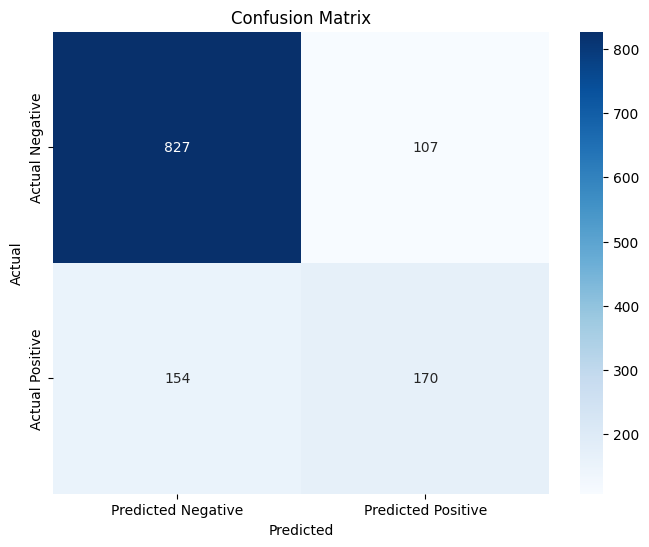

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       934
           1       0.61      0.52      0.57       324

    accuracy                           0.79      1258
   macro avg       0.73      0.71      0.71      1258
weighted avg       0.78      0.79      0.79      1258



LogisticRegression(max_iter=20000)

In [ ]:
logistic_regression(X_train_base.values, X_test_base.values, y_train_base.values, y_test_base.values, 'yes', 'yes')

## Base-line-model prediction estimation.

##### The model demonstrates higher precision, recall, and F1-score for class "0" compared to class "1". This indicates that the model performs better at identifying instances of class "0" (negative class) than class "1" (positive class).
##### While precision for class "1" is moderate at 0.64, recall is relatively lower at 0.55, indicating that the model may miss a significant portion of actual "1" instances.
##### The F1-score for class "1" is notably lower compared to class "0", suggesting that the model's performance for class "1" might be less balanced in terms of precision and recall.
##### Because that we have imbalance significantly in target value accuracy which is 0.80 is no longer valid.

In [ ]:
target_count = base_data['churn'].value_counts()
percentage_of_zero = target_count.values[0]/(target_count.values[0] + target_count.values[1])
percentage_of_one = 1 - percentage_of_zero
print(f'Percentage of zero in targer: {percentage_of_zero}')
print(f'Percentage of one: {percentage_of_one}')

Percentage of zero in targer: 0.7359300476947536
Percentage of one: 0.26406995230524644


##### As it turned out amount of zeros are significantly higher than amount of ones.

# Model Building

###### First task is to do something with "NaN" values which is in column "cumulative_cost". As it turnes out "cumulative_cost" is dependent on "monthly_cost" and "subscription_duration_in_month". In below calculations it is shown that differences between actual "cumulative_cost" and "monthly_cost" multiplied by "subscription_duration_in_month" are very small.

In [ ]:
model_data = to_num(data)

In [ ]:
model_data[model_data['subscription_duration_in_months'] == 0]

,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,has_tv_streaming,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
213,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.35,2,NaN,0
2544,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.75,2,NaN,0
2883,2,2,0,0,1,2,2,0,0,2,1,0,2,2,1,0,19.70,2,NaN,0
2942,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,73.35,1,NaN,0
4478,2,2,0,0,1,2,2,0,0,2,1,1,2,1,0,0,20.25,2,NaN,0
4677,2,2,0,0,1,2,2,0,0,2,1,1,2,1,1,0,19.85,2,NaN,0
4786,0,1,0,1,1,1,0,1,2,1,2,0,1,1,1,0,52.55,1,NaN,0
4855,2,2,0,1,1,2,2,0,0,2,1,1,2,1,1,0,20.00,2,NaN,0
5477,0,1,0,1,1,1,1,1,2,1,3,1,1,1,1,0,56.05,1,NaN,0
6101,0,0,0,0,1,1,1,0,1,0,2,0,1,1,0,0,61.90,1,NaN,0


In [ ]:
model_data[model_data['cumulative_cost'].isna()]

,has_movie_streaming,has_device_protection,subscription_duration_in_months,gender,has_dependents,has_internet_service,has_online_backup,has_phone_service,multiple_phone_lines,has_tv_streaming,payment_method,has_paperless_billing,has_web_security,agreement_type,relationship_status,senior_status,monthly_cost,has_tech_help,cumulative_cost,churn
213,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.35,2,NaN,0
2544,2,2,0,0,1,2,2,0,1,2,1,1,2,1,1,0,25.75,2,NaN,0
2883,2,2,0,0,1,2,2,0,0,2,1,0,2,2,1,0,19.70,2,NaN,0
2942,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,73.35,1,NaN,0
4478,2,2,0,0,1,2,2,0,0,2,1,1,2,1,0,0,20.25,2,NaN,0
4677,2,2,0,0,1,2,2,0,0,2,1,1,2,1,1,0,19.85,2,NaN,0
4786,0,1,0,1,1,1,0,1,2,1,2,0,1,1,1,0,52.55,1,NaN,0
4855,2,2,0,1,1,2,2,0,0,2,1,1,2,1,1,0,20.00,2,NaN,0
5477,0,1,0,1,1,1,1,1,2,1,3,1,1,1,1,0,56.05,1,NaN,0
6101,0,0,0,0,1,1,1,0,1,0,2,0,1,1,0,0,61.90,1,NaN,0


In [ ]:
def test(dt):
    dt = abs(dt['subscription_duration_in_months'] * dt['monthly_cost'] - dt['cumulative_cost'])
    return dt

In [ ]:
difference = test(model_data)
print(f'Mean of difference: {np.mean(difference)}')
print(f'Max of difference: {np.max(difference)}')
print(f'Min of difference: {np.min(difference)}')

Mean of difference: 45.452273449920504
Max of difference: 373.2500000000009
Min of difference: 0.0


###### There are "NaN" values exactly in rows where "subscription_duration_in_month" is zero. Also "agreement_type" in those 10 rows are two years mostly. I can deduce that they have built the agreement but after they quitted. So it is reasonable to replace "NaN" values by "0" in "cumulative_cost".
###### In following graph we see that difference between actual "cumulative_cost" and "monthly_cost" multiplied by "subscription_duration_in_month" are very close to zero mostly. So ve can say that in graph "cumulative_cost" = "subscription_duration_in_month" * "monthly_cost".

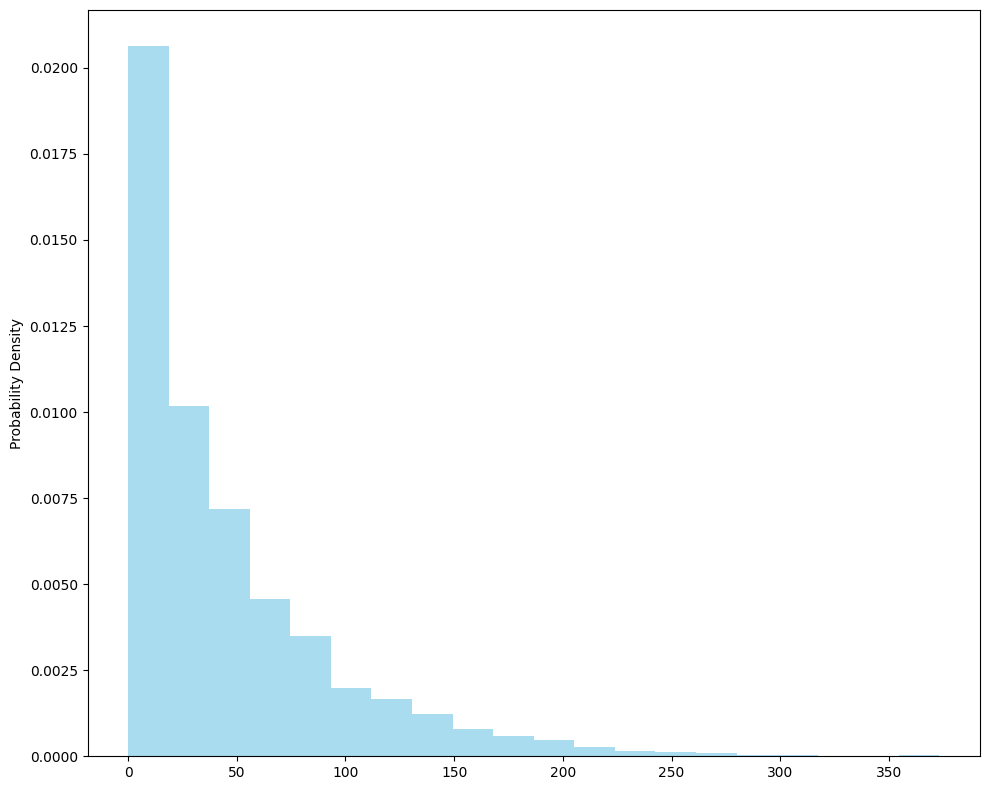

In [ ]:
hist(difference, 'No')

In [ ]:
model_data['cumulative_cost'] = model_data['cumulative_cost'].fillna(0)

### Redress target value's imbalance.
##### This imbalance is quite high and model will be biased identifying Noes as it was seen well in Base-line-model prediction.  

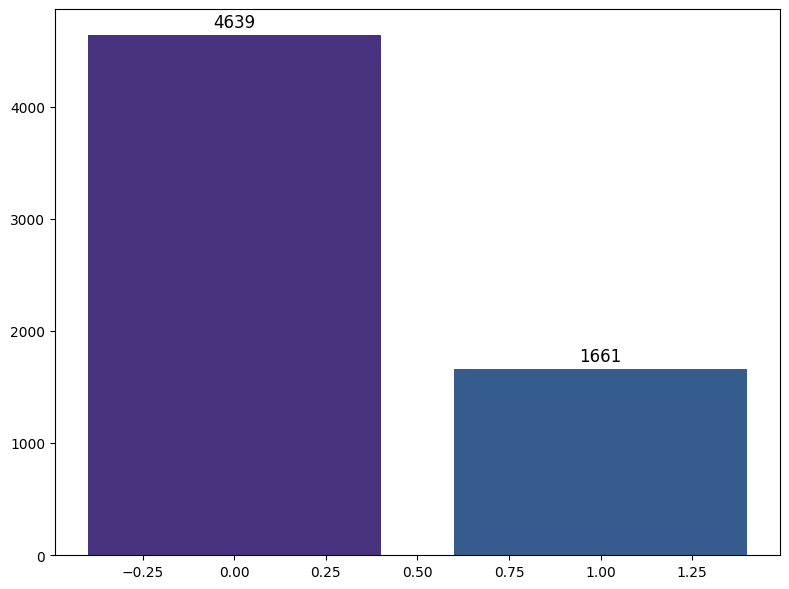

In [ ]:
target_values = model_data.churn.value_counts()
bar(target_values)

In [ ]:
churn_0 = model_data[model_data['churn'] == 0]
churn_1 = model_data[model_data['churn'] == 1]

In [ ]:
print(f'Shape of churn_0: {churn_0.shape}')
print(f'Shape of churn_1: {churn_1.shape}')


Shape of churn_0: (4639, 20)
Shape of churn_1: (1661, 20)


### Spliting data into train and test
#### Test will be globaly and only train will be modified so that to reach maximum scores.
#### Splitted values are copied because of KNN model, since it required different modifications from logistic regression.

In [ ]:
X_train, X_test, y_train, y_test = split_data(model_data)
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

## Categorical values' analysis according to the column "churn"
### Now i check if there are some feature where is significant imballance in relation to target value. It may cause bias towards this feature.

In [ ]:
train_data_ = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_data_.columns = model_data.columns

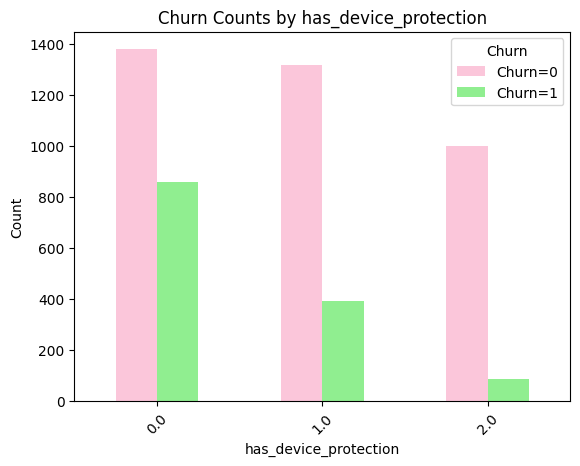

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[1])

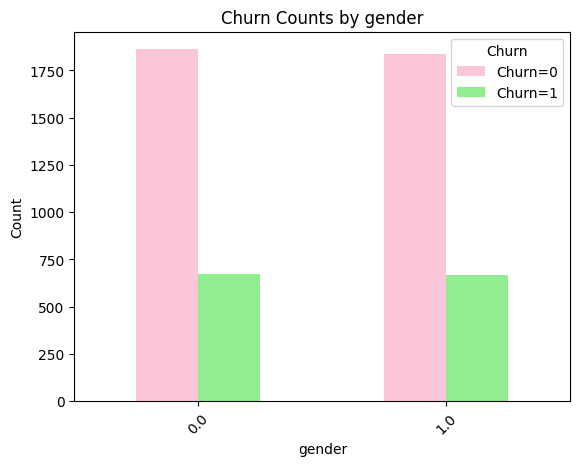

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[3])

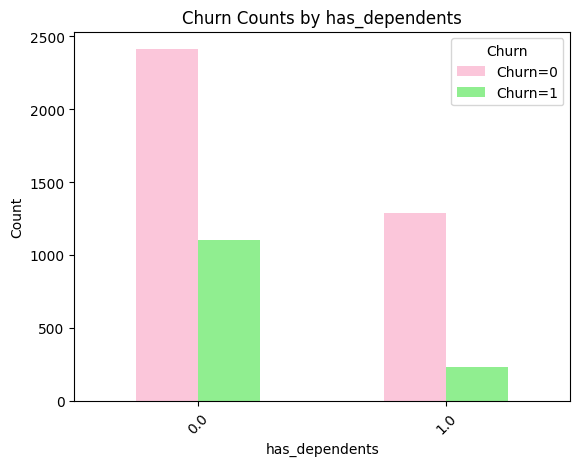

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[4])

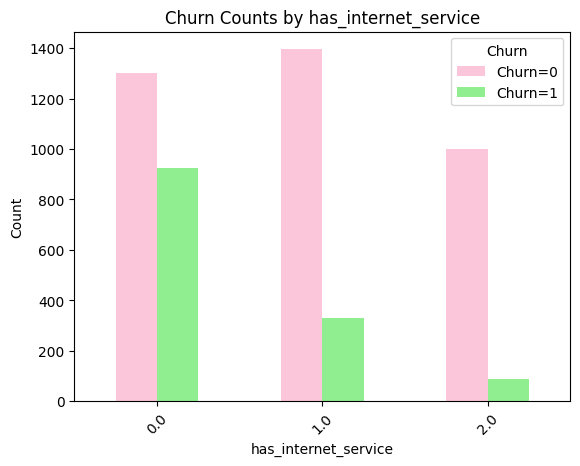

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[5])

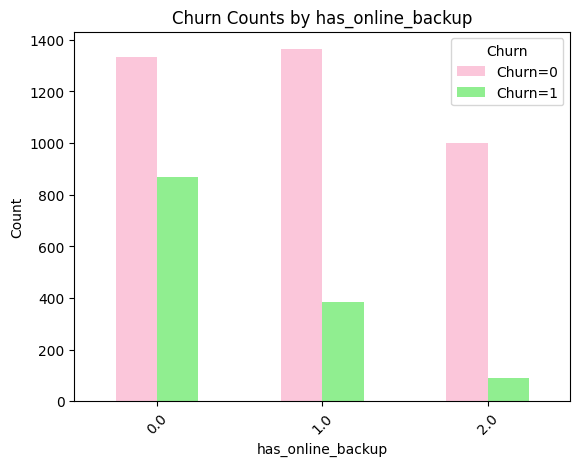

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[6])

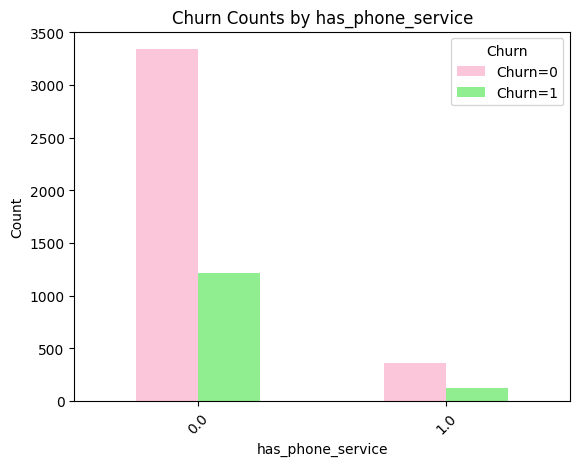

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[7])

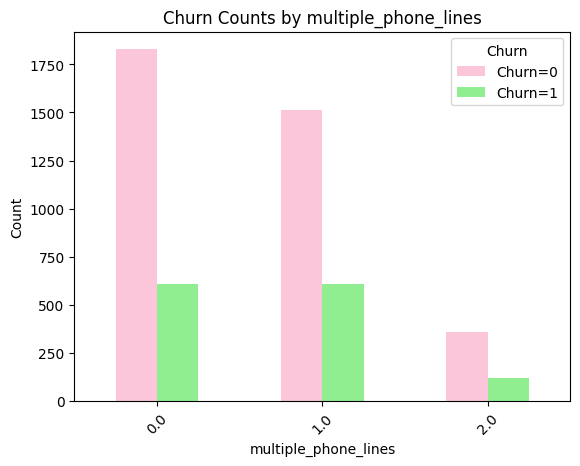

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[8])

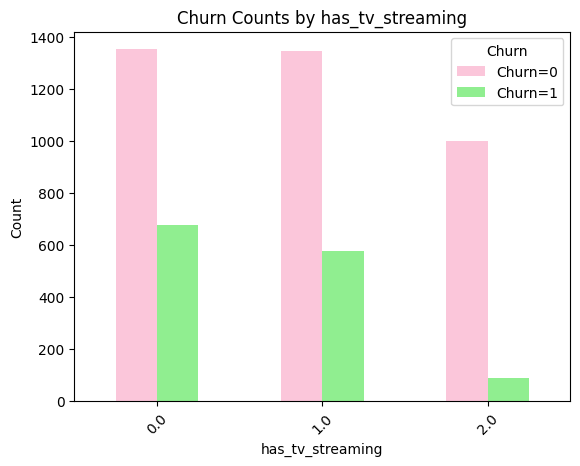

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[9])

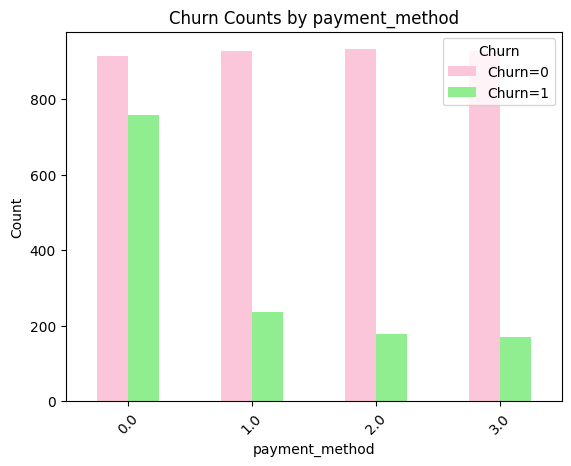

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[10])

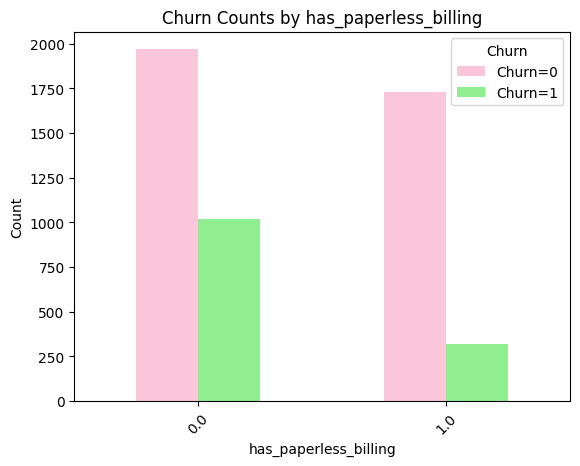

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[11])

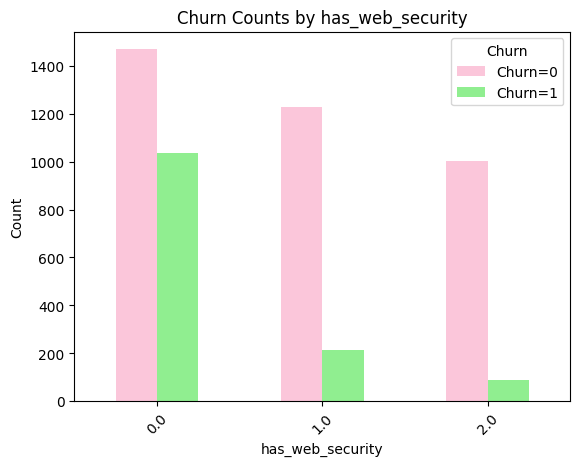

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[12])

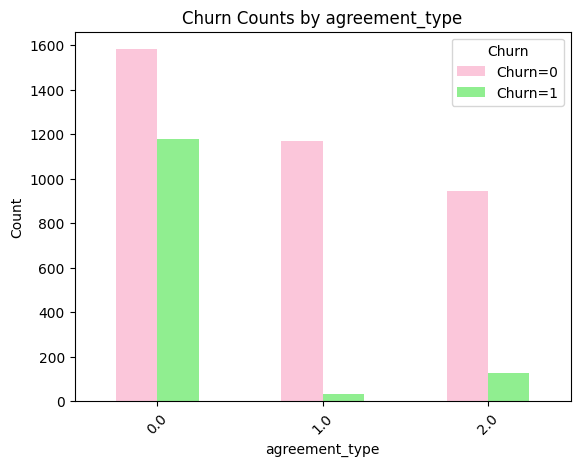

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[13])

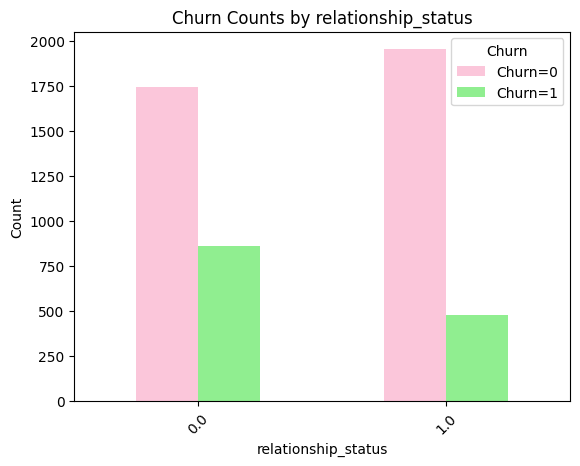

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[14])

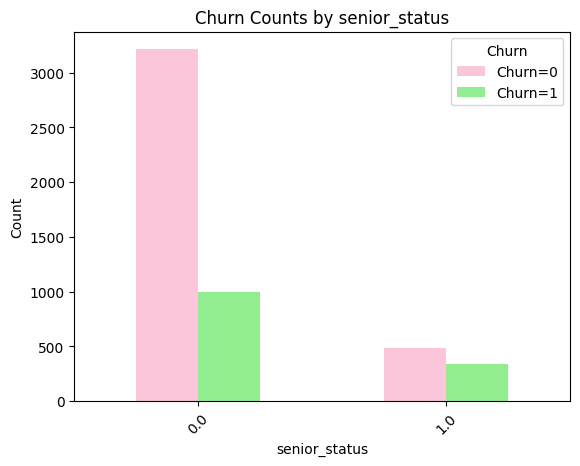

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[15])

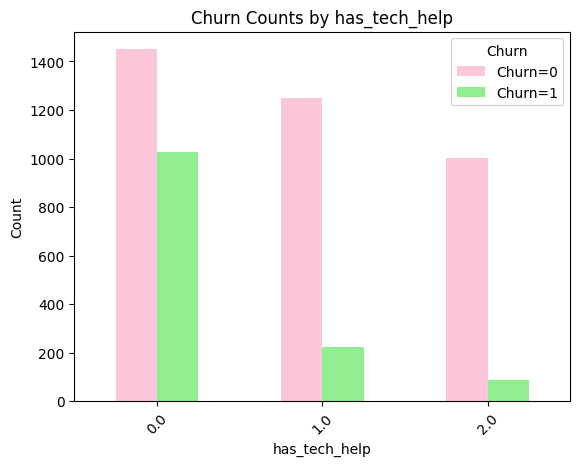

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[17])

#### Here is correlation table where we see correlations of each category to target value. It seems that "agreement_type" has significant correlation on "churn" and on bar of "agreement_type" we see also that mostly all values are when "agreement_type" is 0. There is high correlation of "agreement_type" = 1 and "agreement_type" = 2 to target column and because in both category we have "churn" = 0 it cause big bias towards "churn" = 0.
#### There are other imbalances of feature but they do not have much correlation to target column.

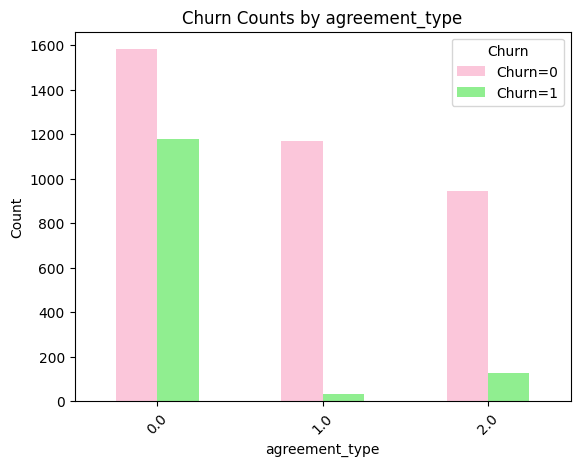

In [ ]:
plot_churn_by_category(train_data_, train_data_.columns[13])

<Axes: >

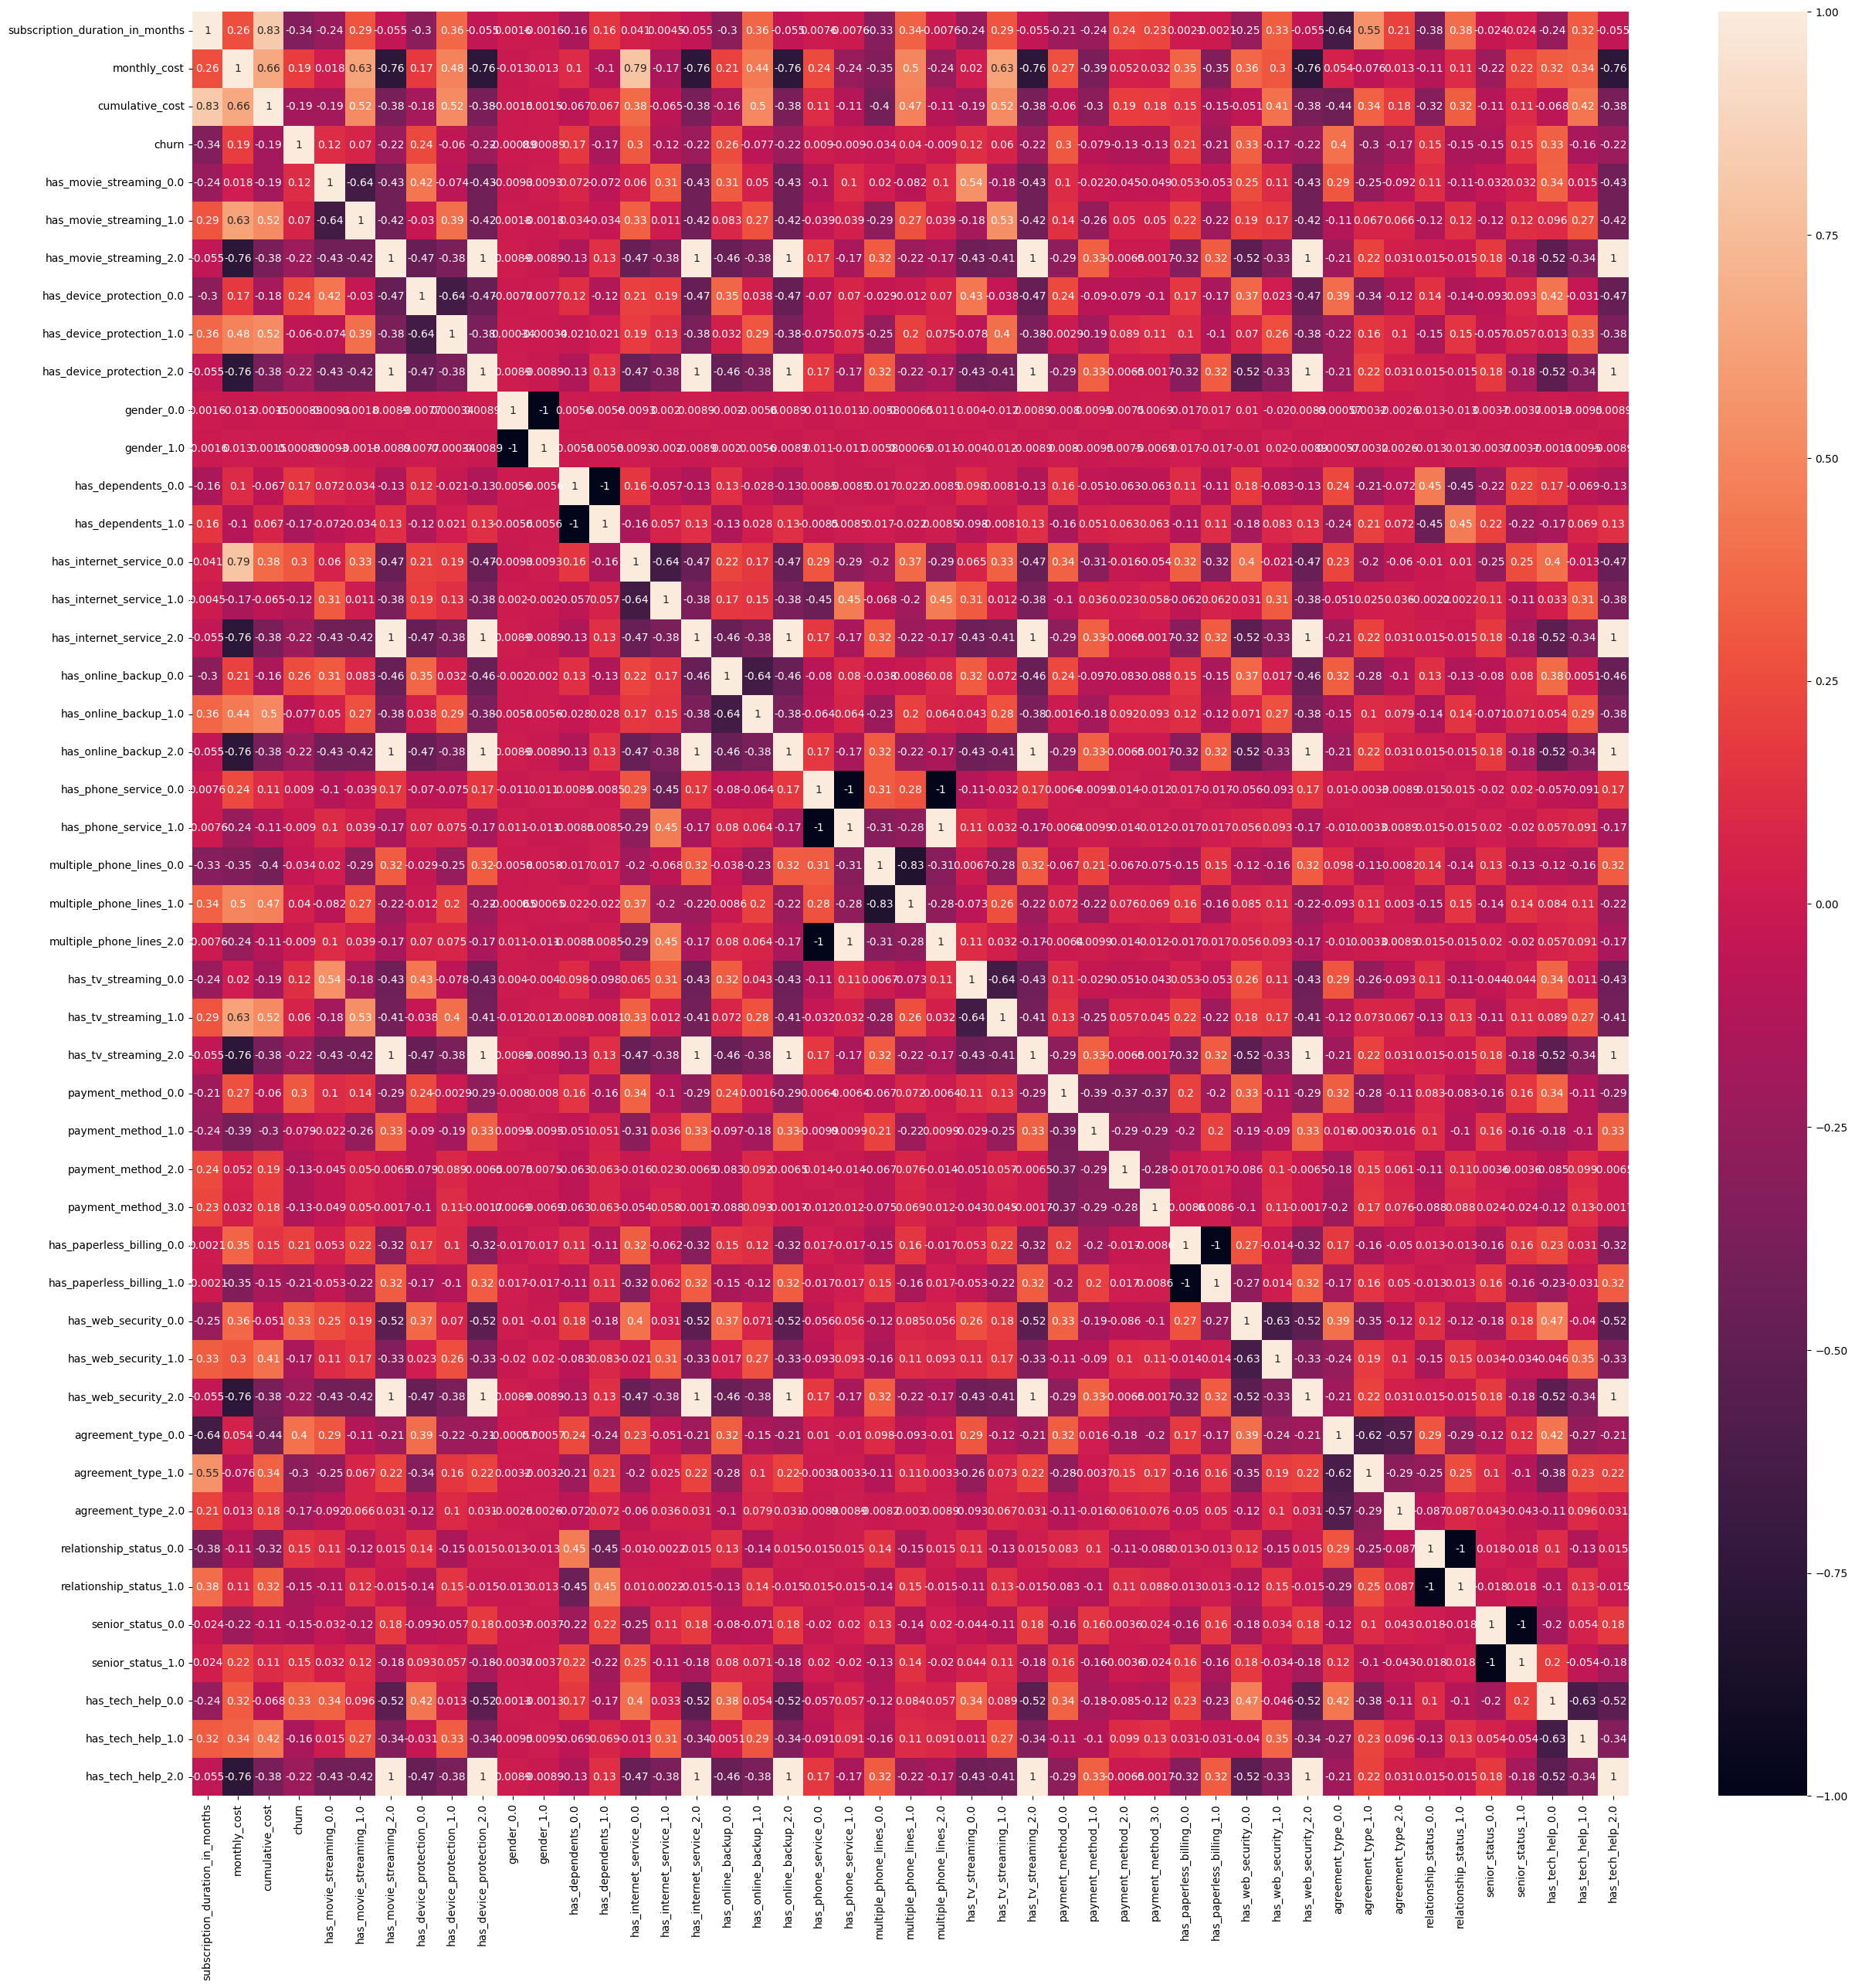

In [ ]:
model_2_data = train_data_.copy()
for i in model_2_data.columns.drop(['subscription_duration_in_months', 'monthly_cost', 'cumulative_cost', 'churn']):
    variables = pd.get_dummies(model_2_data[i], prefix=i, dtype=int)
    model_2_data = pd.concat([model_2_data, variables], axis=1)
model_2_data.drop(['has_movie_streaming', 'has_device_protection', 'gender', 'has_dependents', 'has_internet_service',
                   'has_online_backup', 'has_web_security', 'has_tech_help', 'has_phone_service',
                   'multiple_phone_lines', 'has_tv_streaming', 'payment_method', 'has_paperless_billing',
                   'agreement_type', 'relationship_status', 'senior_status'], axis=1, inplace=True)
cor = model_2_data.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cor, annot=True)

## Scaling of X_train and X_test.
#### Here X_train is scaled by its values and X_test with "min" "max" of X_train.

In [ ]:
X_train, X_test = scale_manually(X_train, X_test)
X_test[X_test['monthly_cost'] < 0] = 0
X_test[X_test['cumulative_cost'] < 0] = 0
X_test[X_test['subscription_duration_in_months'] < 0] = 0

In [ ]:
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_data.columns = model_data.columns


### Balancing data by Undersampling

In [ ]:
def undersampling(data):
    churn_0 = data[data['churn'] == 0]
    churn_1 = data[data['churn'] == 1]
    churn_0_sample = churn_0.sample(churn_1.shape[0])
    ballanced_data_under = pd.DataFrame(pd.concat([churn_0_sample, churn_1], axis = 0))
    return ballanced_data_under

### Balancing data by Oversampling

In [ ]:
def oversampling(data):
    churn_0 = data[data['churn'] == 0]
    churn_1 = data[data['churn'] == 1]
    a = churn_0.shape[0]
    b = churn_1.shape[0]
    churn_1 = churn_1.sample(n = a, replace = True)
    ballanced_data_over = pd.concat([churn_0, churn_1], axis = 0)
    return ballanced_data_over

### Balancing data by SMOTE

In [ ]:
def SMOT(data):
    global model_data
    X = data.iloc[:,: -1]
    y = data.iloc[:, -1]
    smote = SMOTE(sampling_strategy='minority')
    X_sm, y_sm = smote.fit_resample(X, y)
    X_sm.columns = model_data.columns[0:-1]
    y_sm.columns = model_data.columns[-1]
    data_smot = pd.DataFrame(pd.concat([X_sm, y_sm], axis = 1))
    return data_smot

### Here we see three different ballancing methods used. All of them has same scores and I also tested all of them on following models and mostly results are quite similan. I choose oversampling method still for following reasons:
###### 1). Oversampling keeps all original data intact, avoiding the loss of potentially useful information that occurs with undersampling.
###### 2). More data can lead to better model performance, especially for complex models that benefit from larger datasets.
###### 3). Oversampling duplicates existing data, thus avoiding the potential introduction of noise or unrealistic samples that can occur with SMOTE.

In [ ]:
logistic_regression(undersampling(train_data).iloc[:, :-1], X_test, undersampling(train_data).iloc[:, -1], y_test.values, 'no', 'yes')

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       939
           1       0.53      0.83      0.65       321

    accuracy                           0.77      1260
   macro avg       0.73      0.79      0.74      1260
weighted avg       0.83      0.77      0.78      1260



LogisticRegression(max_iter=20000)

In [ ]:
logistic_regression(oversampling(train_data).iloc[:, :-1].values, X_test.values, oversampling(train_data).iloc[:, -1].values, y_test.values, 'no', 'yes')

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       939
           1       0.52      0.82      0.64       321

    accuracy                           0.76      1260
   macro avg       0.72      0.78      0.73      1260
weighted avg       0.82      0.76      0.78      1260



LogisticRegression(max_iter=20000)

In [ ]:
logistic_regression(SMOT(train_data).iloc[:, :-1].values, X_test.values, SMOT(train_data).iloc[:, -1].values, y_test.values, 'no', 'yes')

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       939
           1       0.53      0.82      0.64       321

    accuracy                           0.77      1260
   macro avg       0.73      0.78      0.73      1260
weighted avg       0.82      0.77      0.78      1260



LogisticRegression(max_iter=20000)

In [ ]:
data_under = undersampling(train_data)
data_under_knn = data_under.copy()
data_over = oversampling(train_data)
data_over_knn = data_over.copy()
data_SMOT = SMOT(train_data)
data_SMOT_knn = data_SMOT.copy()

In [ ]:
X_train_over = data_over.iloc[:, :-1]
y_train_over = data_over.iloc[:, -1]
handle_test(X_train_over, X_test, y_train_over, y_test.values, 'no', 'yes')[1]

Outlier Border: 0.0
Outlier Border: 1.0
Outlier Border: 0.0
Outlier Border: 1.0
Outlier Border: 0.0
Outlier Border: 0.9226176768607223
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       939
           1       0.51      0.74      0.61       321

    accuracy                           0.75      1260
   macro avg       0.70      0.75      0.71      1260
weighted avg       0.80      0.75      0.77      1260



LogisticRegression(class_weight={0: 2.925233644859813, 1: 1}, max_iter=20000)

## Distribution analysis
### In data we have three noncategorical feature and for model prediction it is assumed that they must have normal distribution.

##### Here we see distribution of 'subscription_duration_in_months' initially.

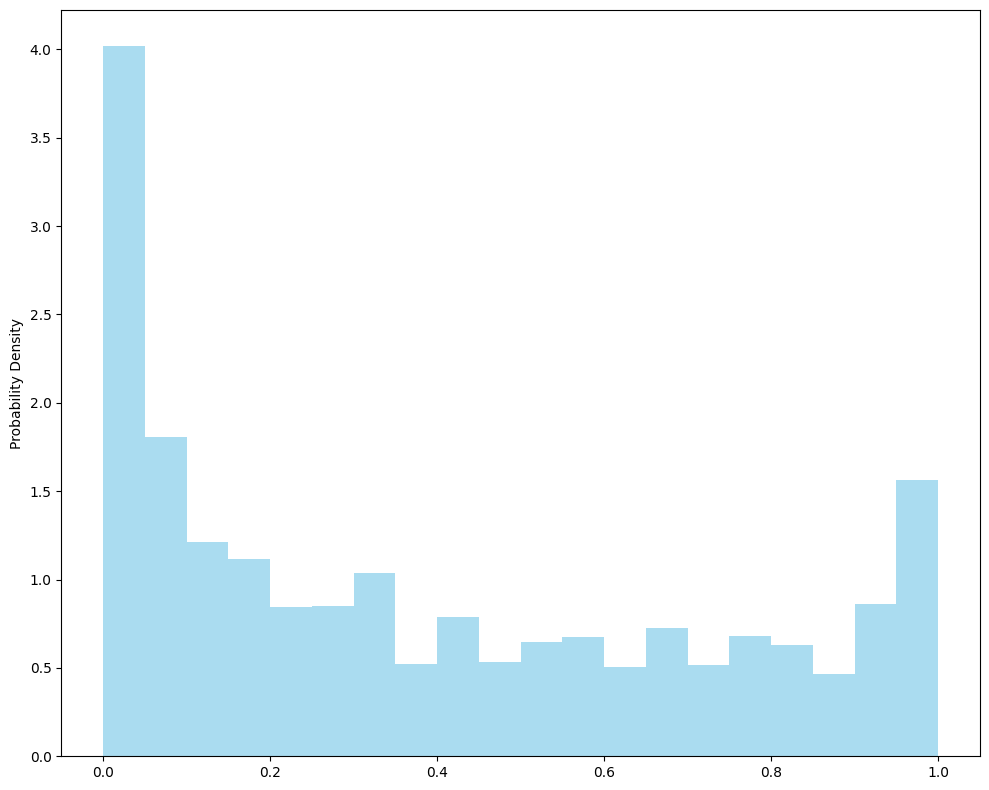

In [ ]:
hist(X_train_over['subscription_duration_in_months'], 'No')

#### After transformation.

<Figure size 1200x800 with 0 Axes>

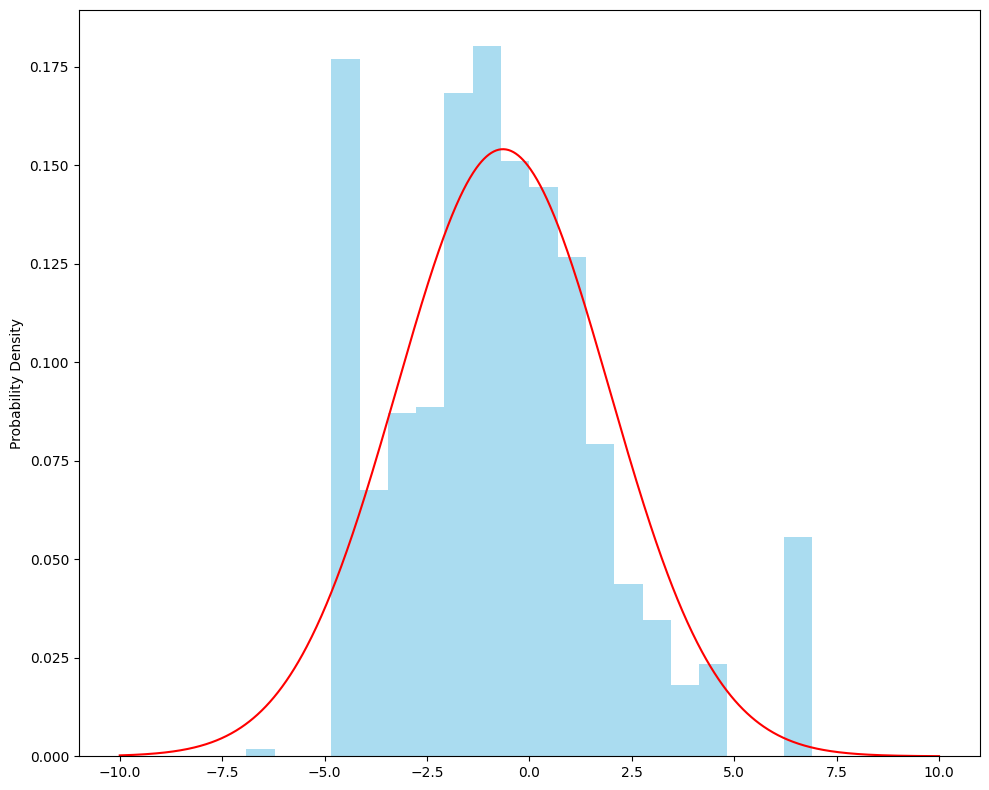

In [ ]:
epsilon = 1e-3
X_train_over['subscription_duration_in_months'] = np.log((X_train_over['subscription_duration_in_months'] + epsilon) / (1 - X_train_over['subscription_duration_in_months'] + epsilon))

plt.figure(figsize=(12, 8))
hist(X_train_over['subscription_duration_in_months'], 'Yes')

### Here we see distribution of 'monthly_cost' initially.

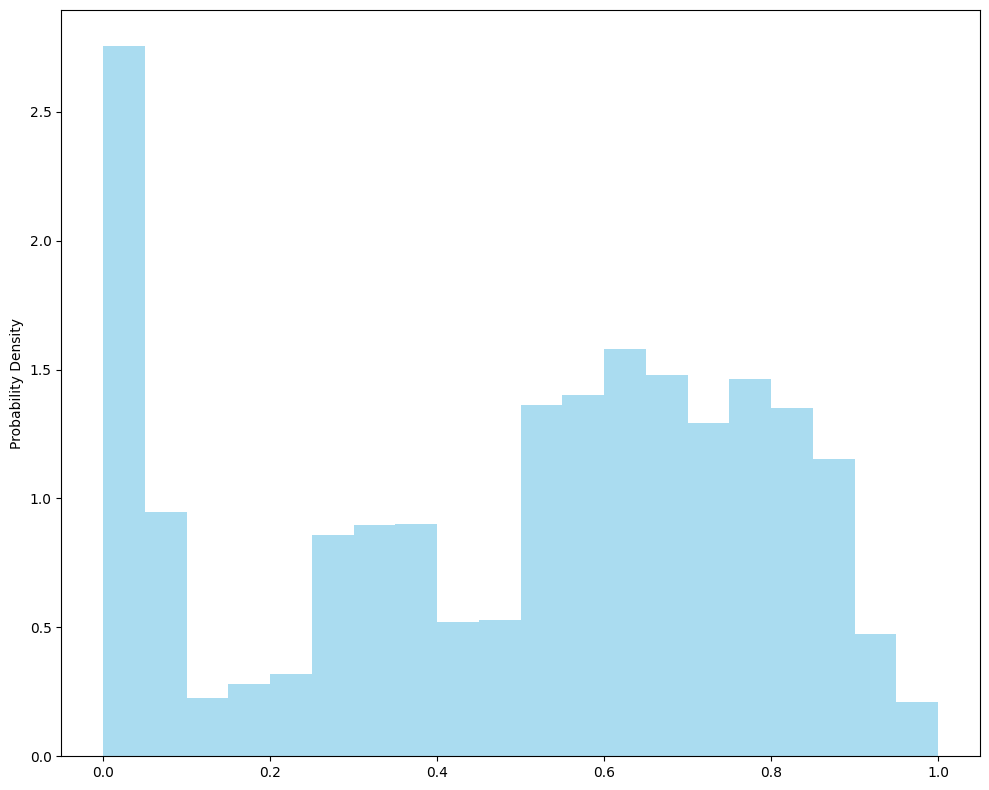

In [ ]:
hist(X_train_over['monthly_cost'], 'No')

#### After transformation.

<Figure size 1200x800 with 0 Axes>

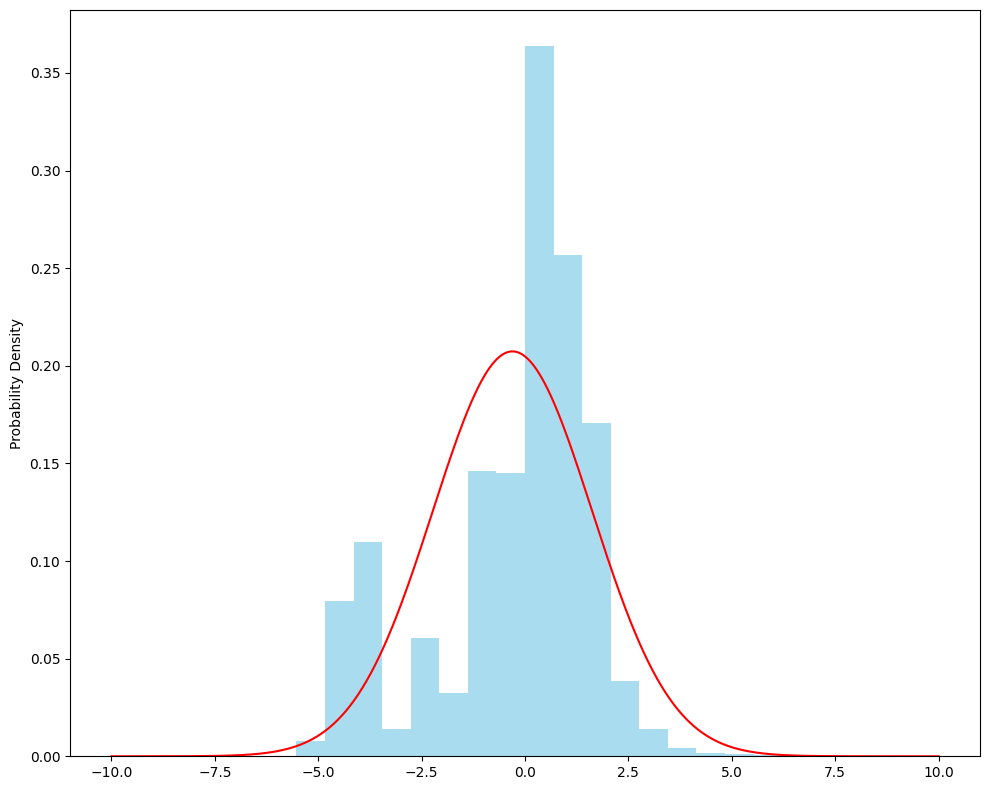

In [ ]:
epsilon = 1e-3
X_train_over['monthly_cost'] = np.log((X_train_over['monthly_cost'] + epsilon) / (1 - X_train_over['monthly_cost'] + epsilon))

plt.figure(figsize=(12, 8))
hist(X_train_over['monthly_cost'], 'Yes')

### Here we see distribution of 'cumulative_cost' initially.

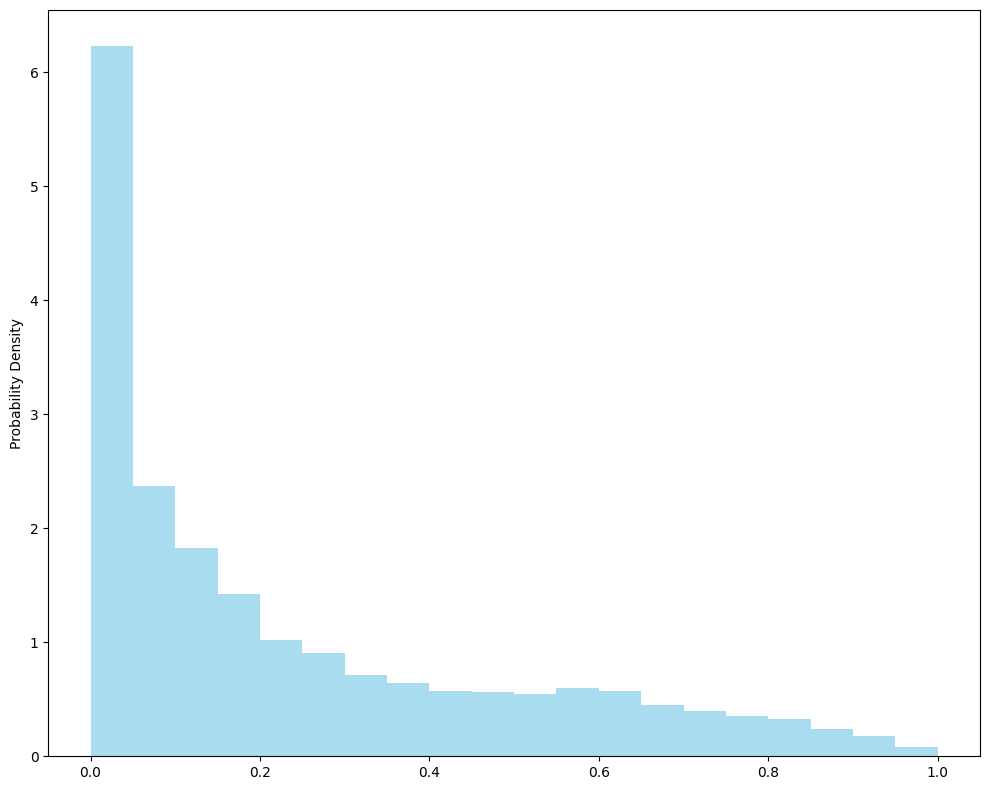

In [ ]:
hist(X_train_over['cumulative_cost'], 'No')

#### After transformation.

<Figure size 1200x800 with 0 Axes>

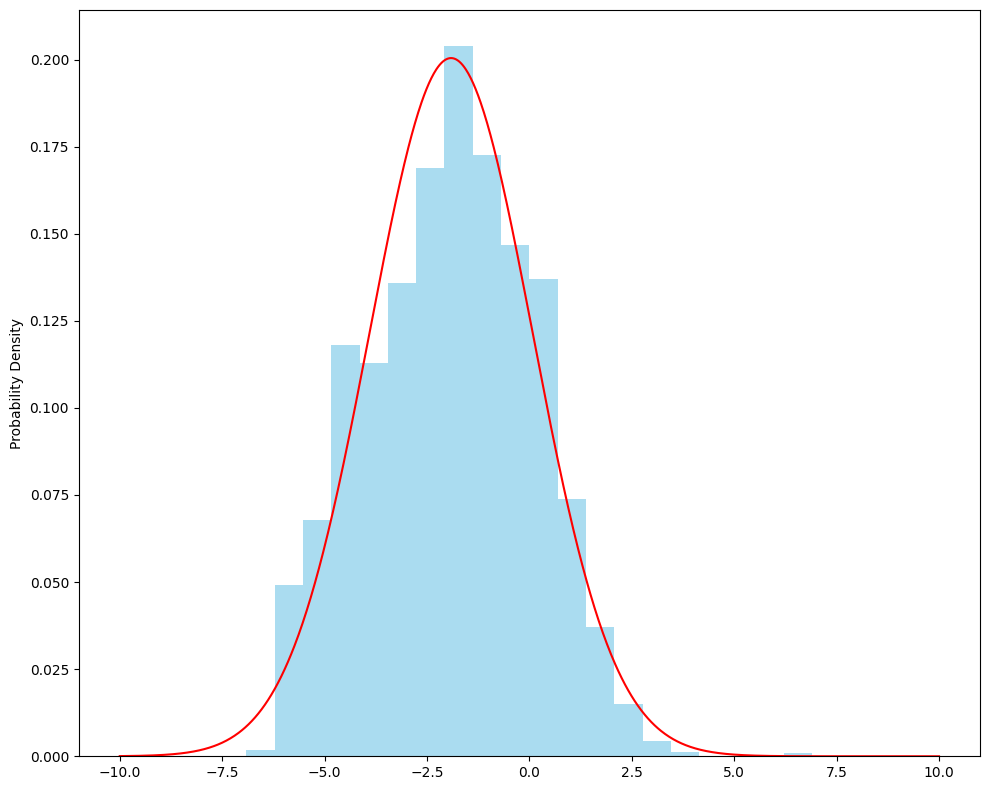

In [ ]:
epsilon = 1e-3
X_train_over['cumulative_cost'] = np.log((X_train_over['cumulative_cost'] + epsilon) / (1 - X_train_over['cumulative_cost'] + epsilon))

plt.figure(figsize=(12, 8))
hist(X_train_over['cumulative_cost'], 'Yes')

### Here we see the result of transformation in scores. It is visible that accuracy increased from 75 to 80 and slight increase in other values. Beacuse there is balance in training data accuracy becomes more valid.

In [ ]:
handle_test(X_train_over, X_test, y_train_over, y_test, 'no', 'yes')[1]

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       939
           1       0.68      0.54      0.60       321

    accuracy                           0.82      1260
   macro avg       0.76      0.72      0.74      1260
weighted avg       0.81      0.82      0.81      1260



LogisticRegression(class_weight={0: 2.925233644859813, 1: 1}, max_iter=20000)

## Outliers analisis
#### I replace outliers' values by closest wiskers of boxplot for several reasons.
###### 1). Replacing outliers with the closest whiskers maintains the overall distribution shape of the data better than dropping them or replacing them with the mean or median, which can distort the data distribution.
###### 2). Ropping outliers results in a loss of potentially valuable data. By replacing them with the closest whiskers, data retains all data points, preserving the dataset's size and richness.

### Here are boxplot transformations to avoid having outliers.

#### Before transformation we have this graph of "subscription_duration_in_months".

Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341


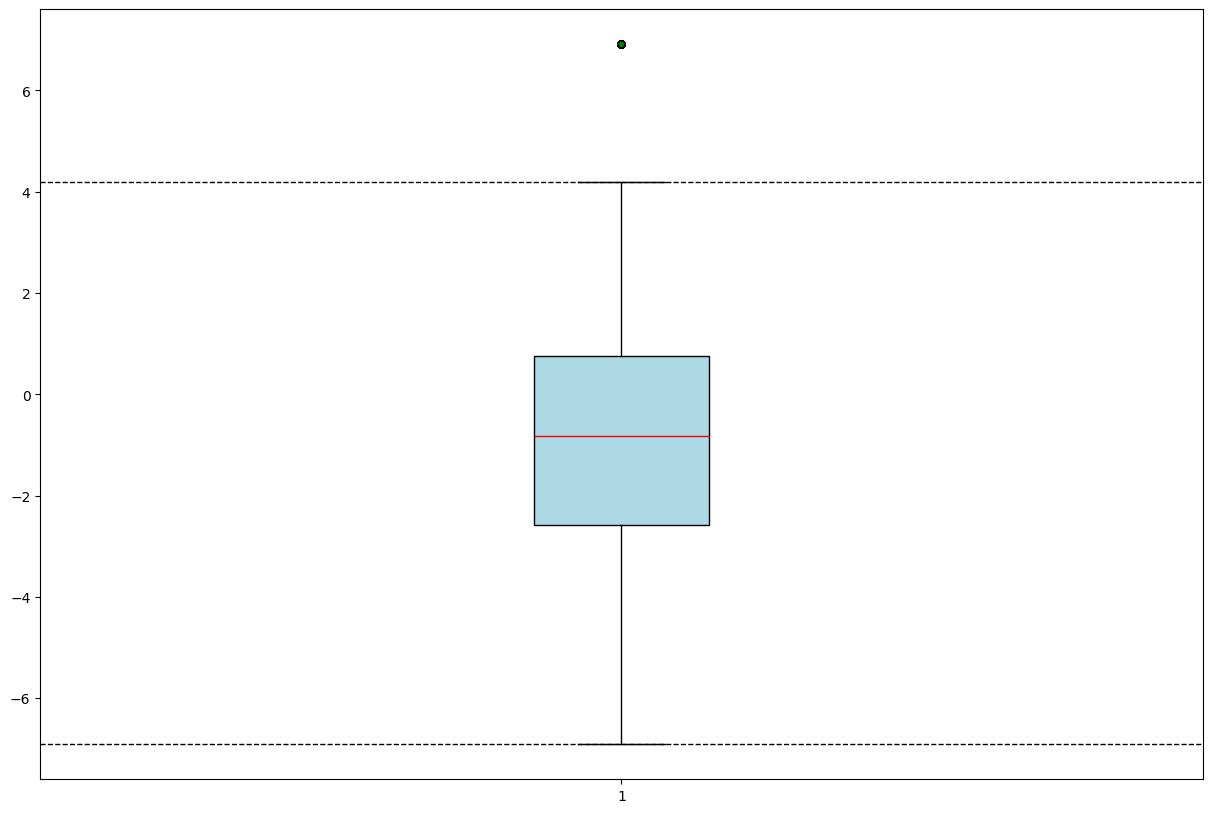

In [ ]:
border_1 = boxplot(X_train_over, 'subscription_duration_in_months', 'Yes')

In [ ]:
X_train_over.loc[X_train_over['subscription_duration_in_months'] > border_1[1], 'subscription_duration_in_months'] = border_1[1]
X_train_over.loc[
    X_train_over['subscription_duration_in_months'] < border_1[0], 'subscription_duration_in_months'] = border_1[0]

#### After transformation.

Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341


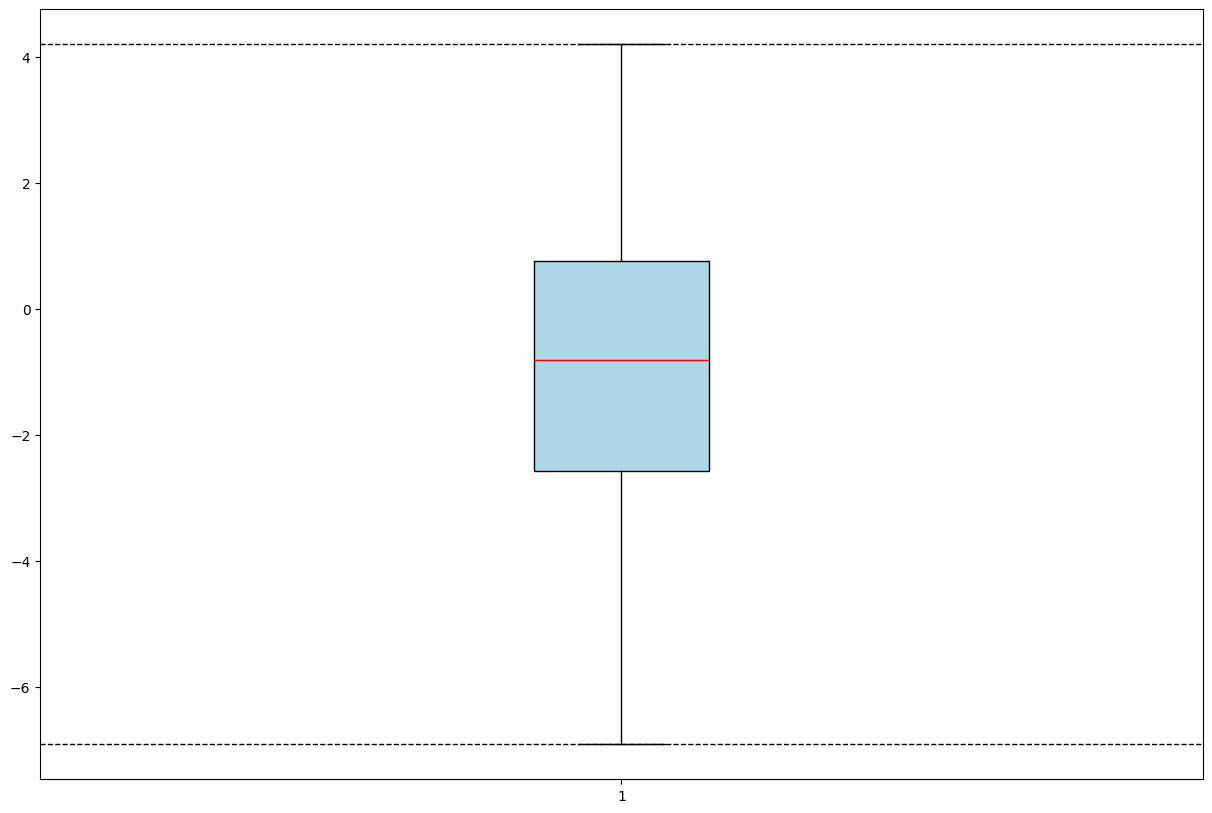

[-6.90875477931522, 4.19416738506341]

In [ ]:
boxplot(X_train_over, 'subscription_duration_in_months', 'Yes')

#### Before transformation we have this graph of "monthly_cost".

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888


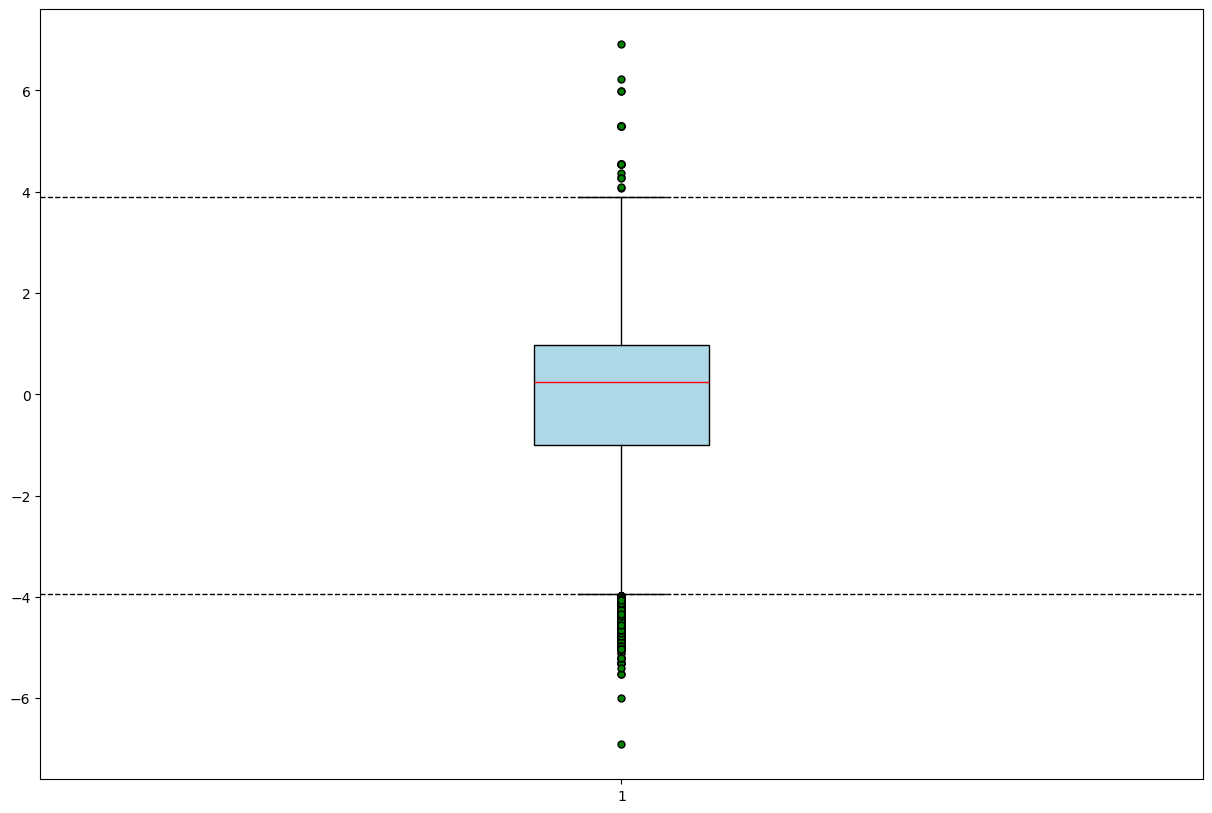

In [ ]:
border_2 = boxplot(X_train_over, 'monthly_cost', 'Yes')

In [ ]:
X_train_over.loc[X_train_over['monthly_cost'] > border_2[1], 'monthly_cost'] = border_2[1]
X_train_over.loc[
    X_train_over['monthly_cost'] < border_2[0], 'monthly_cost'] = border_2[0]

#### After transformation.

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888


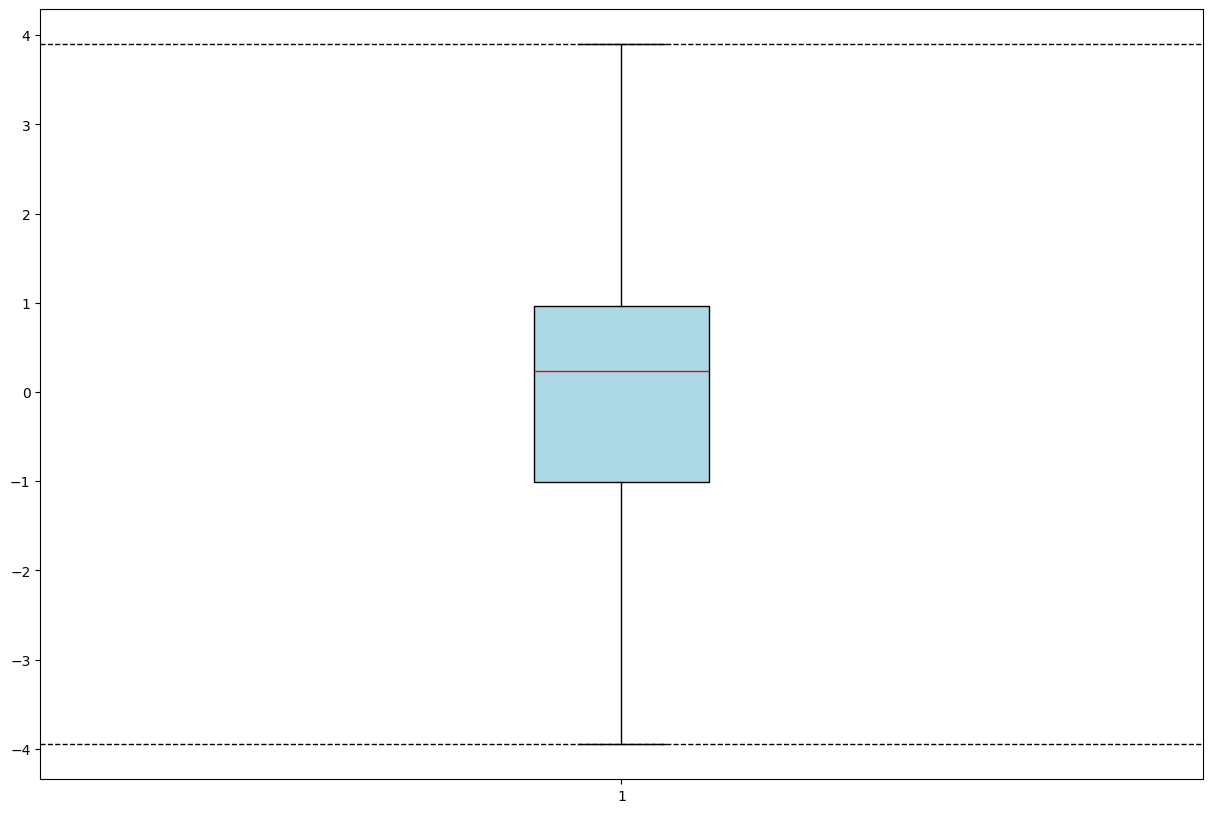

[-3.9495437006248992, 3.897245419839888]

In [ ]:
boxplot(X_train_over, 'monthly_cost', 'Yes')

#### Before transformation we have this graph of "cumulative_cost".

Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848


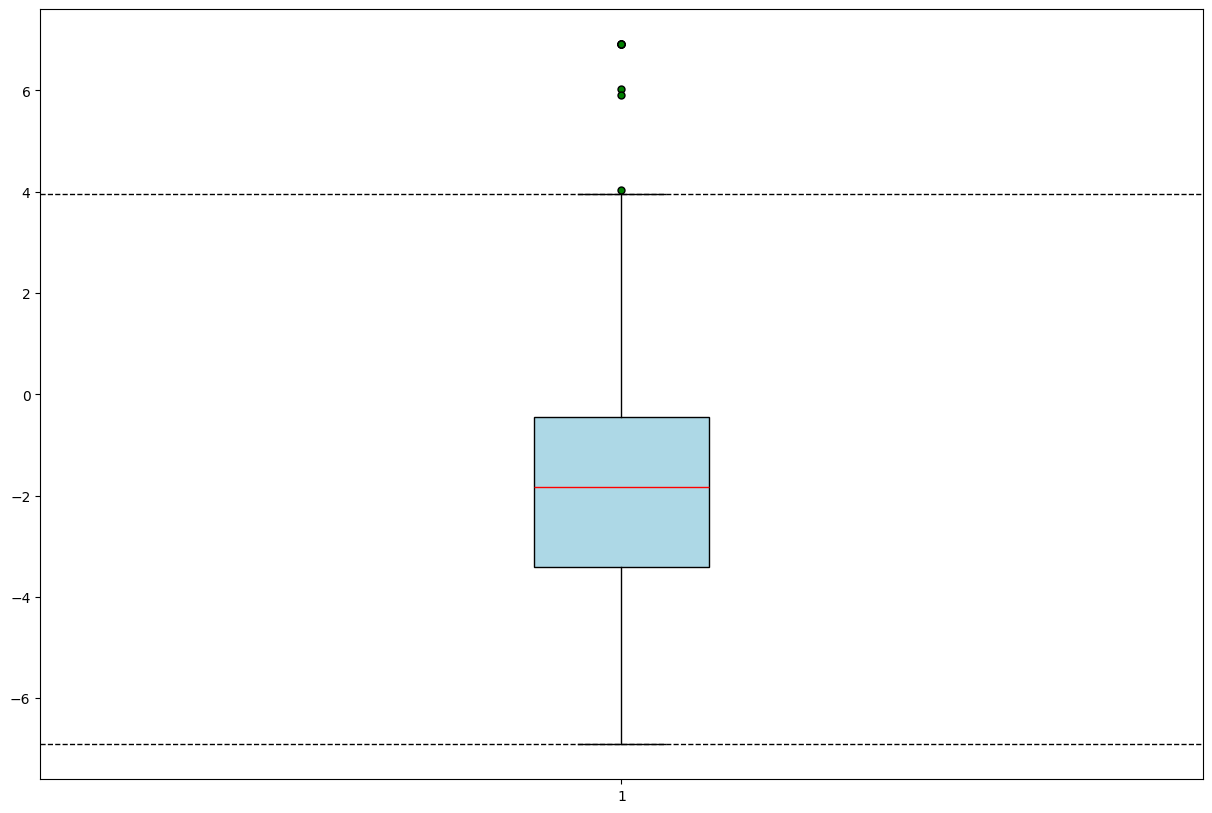

In [ ]:
border_3 = boxplot(X_train_over, 'cumulative_cost', 'Yes')

In [ ]:
X_train_over.loc[X_train_over['cumulative_cost'] > border_3[1], 'cumulative_cost'] = border_3[1]
X_train_over.loc[
    X_train_over['cumulative_cost'] < border_3[0], 'cumulative_cost'] = border_3[0]

#### After transformation.

Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848


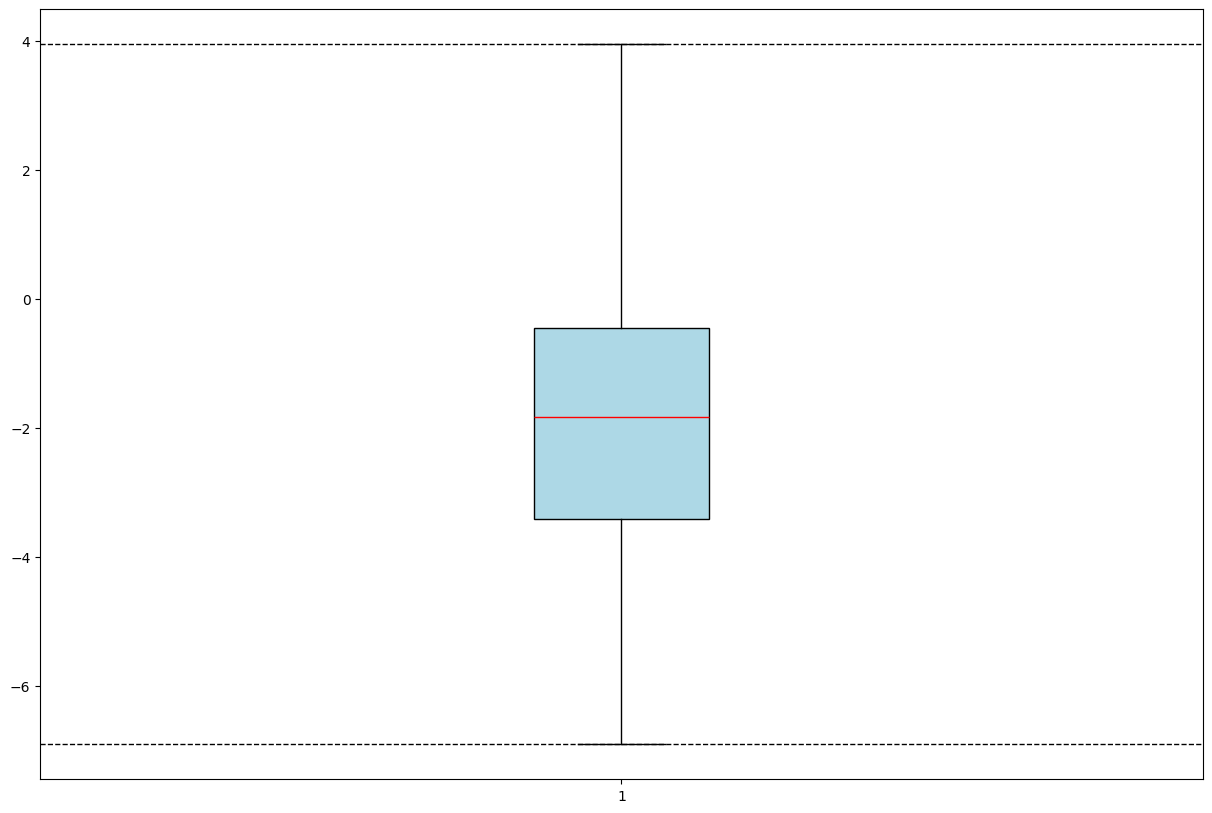

[-6.90875477931522, 3.952529970894848]

In [ ]:
boxplot(X_train_over, 'cumulative_cost', 'Yes')

In [ ]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test, 'no', 'yes')[1]

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       939
           1       0.68      0.54      0.60       321

    accuracy                           0.82      1260
   macro avg       0.77      0.73      0.74      1260
weighted avg       0.81      0.82      0.81      1260



LogisticRegression(class_weight={0: 2.925233644859813, 1: 1}, max_iter=20000)

## Feature engineering

In [ ]:
corr_data = pd.concat([X_train_over, y_train_over], axis=1)

<Axes: >

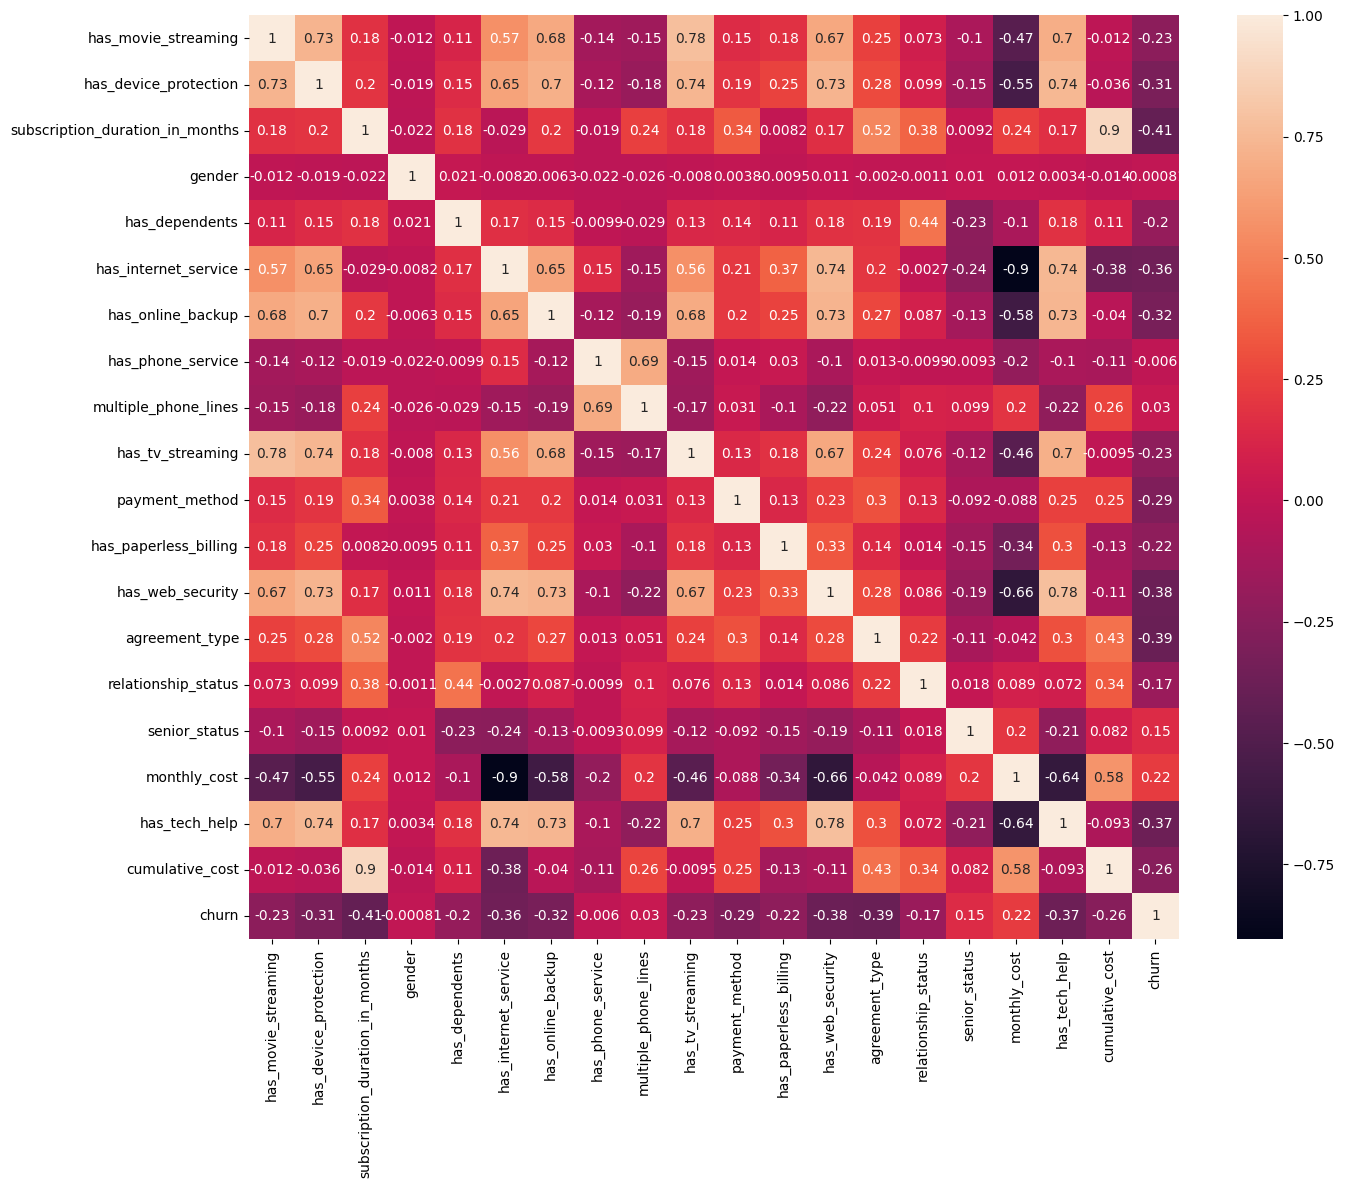

In [ ]:
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848


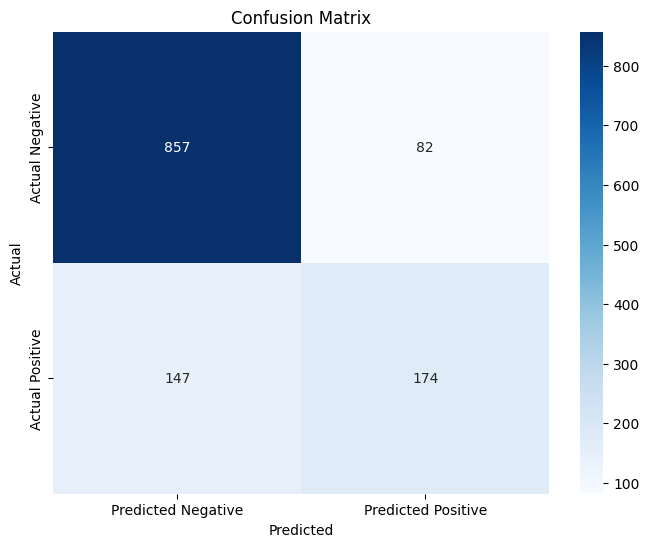

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       939
           1       0.68      0.54      0.60       321

    accuracy                           0.82      1260
   macro avg       0.77      0.73      0.74      1260
weighted avg       0.81      0.82      0.81      1260



(      has_movie_streaming  has_device_protection  \
 0                     0.5                    0.0   
 1                     0.5                    0.5   
 2                     0.0                    0.0   
 3                     0.0                    0.0   
 4                     0.5                    0.0   
 ...                   ...                    ...   
 1255                  0.0                    0.0   
 1256                  1.0                    1.0   
 1257                  0.5                    0.0   
 1258                  1.0                    1.0   
 1259                  1.0                    1.0   
 
       subscription_duration_in_months  gender  has_dependents  \
 0                           -1.818536     1.0             1.0   
 1                           -0.885291     0.0             1.0   
 2                           -1.249558     0.0             0.0   
 3                           -1.171202     1.0             0.0   
 4                           -1.

In [ ]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test, 'yes', 'yes')

##### Here i create some feature with idea that some feature which did not have much influence on target value, or which had extremelly high correlation to be ballanced so that  not cause overfitting as well as not having low influence.

In [ ]:
X_train_over['internet_with_backup'] = X_train_over['has_internet_service'] * X_train_over['has_online_backup']
X_train_over['internet_and_tv_streaming'] = X_train_over['has_tv_streaming'] * X_train_over['has_internet_service']
X_train_over['total_services'] = X_train_over[['has_movie_streaming', 'has_device_protection', 'has_online_backup', 'has_web_security', 'has_tech_help']].sum(axis=1)
X_train_over['avg_monthly_cost_per_service'] = np.where(X_train_over['total_services'] != 0,
                                                  X_train_over['monthly_cost'] / X_train_over['total_services'],
                                                  0)
X_train_over['avg_monthly_cost_per_service'] = X_train_over['avg_monthly_cost_per_service'].replace([np.inf, -np.inf], 0)



<Axes: >

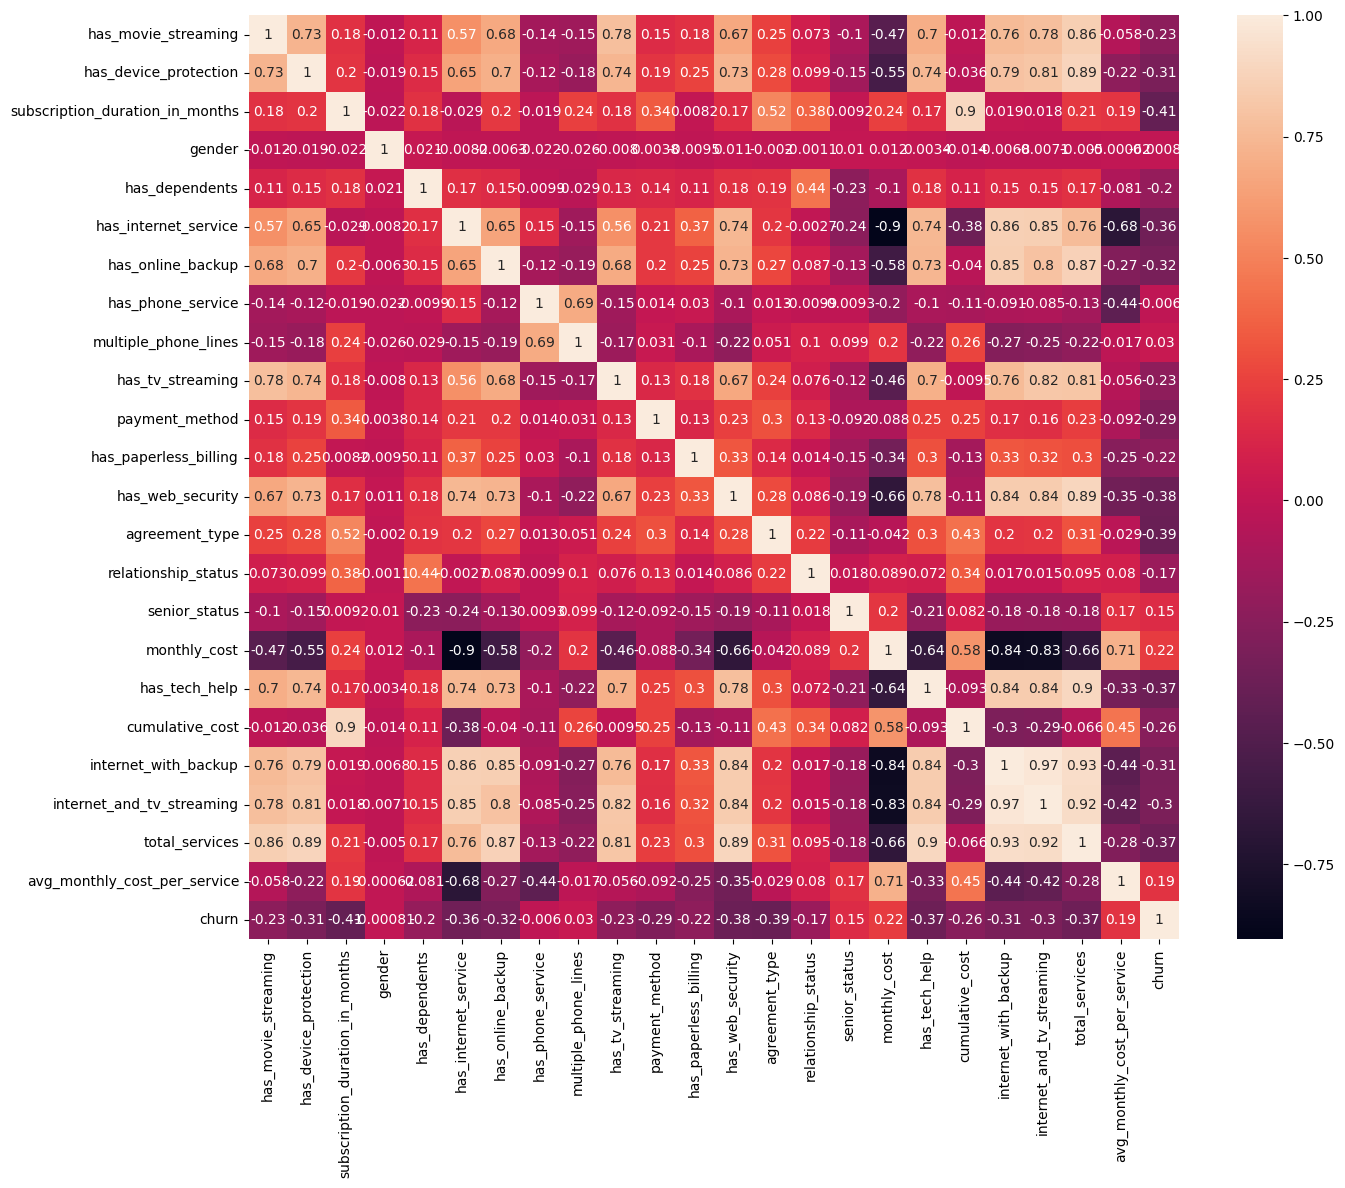

In [ ]:
corr_data_ = pd.concat([X_train_over, y_train_over], axis=1)
corr_ = corr_data_.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_, annot=True)

#### Here is result of adding features. Here is no big difference after feature adding. Some cases it has slight influence to scores.

In [ ]:
handle_test(X_train_over.values, X_test, y_train_over.values, y_test,'no', 'yes', feature_engineer = 'Yes')[1]

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       939
           1       0.68      0.55      0.61       321

    accuracy                           0.82      1260
   macro avg       0.77      0.73      0.74      1260
weighted avg       0.81      0.82      0.81      1260



LogisticRegression(class_weight={0: 2.925233644859813, 1: 1}, max_iter=20000)

## KNN - K Nearest Neighbore
### Here is KNN model which inclueds no feature changes and is normalized.

In [ ]:
def knn(X_train_knn, X_test_knn, y_train_knn, y_test_knn, k, scores):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the KNN model
    knn.fit(X_train_knn, y_train_knn)
    # Make prediction
    knn_pred = knn.predict(X_test_knn)
    # Generate the classification report
    report = metrics.classification_report(y_test_knn, knn_pred)
    if scores == 'yes':
        print(report)
    return knn
# Extract features and labels
X_train_over_knn = data_over_knn.iloc[:, :-1]
y_train_over_knn = data_over_knn.iloc[:, -1]

X_test_knn.columns = X_train_over_knn.columns
y_test_knn.columns = ['churn']

X_train_knn = oversampling(train_data_)
# Scale both training and test data
X_train_knn_scaled, X_test_knn_scaled = scale_manually(X_train_knn.iloc[:,:-1], X_test_knn)
# Call the knn function with scaled test data
knn(X_train_knn_scaled, X_test_knn_scaled, y_train_over_knn, y_test_knn, 3, 'yes')

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       939
           1       0.44      0.66      0.53       321

    accuracy                           0.70      1260
   macro avg       0.65      0.69      0.66      1260
weighted avg       0.76      0.70      0.72      1260



KNeighborsClassifier(n_neighbors=3)

### This model is not getting desired scores compared to logistic regression in all terms so this model is no longer valid.

## Decision Tree
### Here is another model and its visualization as well. The depth of nodes is 2 because this model is so complex  than after setting max_depth value more that 2 is not visible. But saving this graph as image makes it easier to read the graph.

              precision    recall  f1-score   support

           0       0.91      0.24      0.38       939
           1       0.29      0.93      0.45       321

    accuracy                           0.41      1260
   macro avg       0.60      0.59      0.41      1260
weighted avg       0.76      0.41      0.39      1260



DecisionTreeClassifier(max_depth=3)

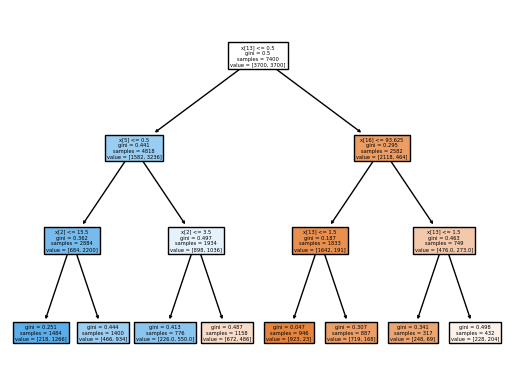

In [ ]:
def decision_tree(train_data, X_test, y_test,visualization, scores):
    X_train_tree = train_data.iloc[:,:-1]
    y_train_tree = train_data.iloc[:,-1]
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train_tree, y_train_tree)
    tree_pred = clf.predict(X_test)
    report = metrics.classification_report(y_test, tree_pred)
    if scores == 'yes':
        print(report)
    if visualization == 'yes':
        tree.plot_tree(clf,filled=True, max_depth=3)
    return clf
decision_tree(oversampling(train_data_), X_test, y_test,'yes', 'yes')

## All models' predictions

#### Here are three different model result and each variable returns model.

In [ ]:
logistic_regression_model = handle_test(X_train_over.values, X_test, y_train_over.values, y_test,'no', 'no', feature_engineer = 'Yes')[1]
knn_model = knn(X_train_knn_scaled, X_test_knn_scaled, y_train_over_knn, y_test_knn, 5, 'no')
decision_tree_model = decision_tree(oversampling(train_data_), X_test, y_test, 'no', 'no')

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848


#### Because X_test requires all transformations to be made what train data faced in logistic regression "X_test_with_features" is X_test with all  additional features and transformations.

In [ ]:
X_test_with_features = handle_test(X_train_over.values, X_test, y_train_over.values, y_test, 'no', 'no', feature_engineer = 'Yes')[0]

Outlier Border: -3.9495437006248992
Outlier Border: 3.897245419839888
Outlier Border: -6.90875477931522
Outlier Border: 4.19416738506341
Outlier Border: -6.90875477931522
Outlier Border: 3.952529970894848


### Because logistic regression is not bad at predicting, its main weakness is identifying 1-s in "churn". So because decision_tree has better recall in that i try combination of both.

## Combination of decision_tree model and logistic_regression model

###### This code iterates over the predicted probabilities from the logistic regression and decision tree models. For each instance, it calculates a combined probability using weighted averages based on each model's accuracy. If the combined probability is 0.5 or higher, it appends 1 (indicating a positive class) to the prediction list; otherwise, it appends 0 (indicating a negative class).

In [ ]:
# Initialize the imputer
imputer = SimpleImputer(strategy='median')  # You can choose other strategies as well
# Fit and transform X_test_with_features to impute missing values
X_test_imputed = imputer.fit_transform(X_test_with_features)
# Predict probabilities for logistic regression and decision tree models
log_probs = logistic_regression_model.predict_proba(X_test_imputed)
dec_probs = decision_tree_model.predict_proba(X_test)
# Predict labels for logistic regression and decision tree models
log = logistic_regression_model.predict(X_test_imputed)
dec = decision_tree_model.predict(X_test)
# Compute the final prediction using weighted voting
logistic_weight = 0.8  # accuracy of logistic regression
decision_weight = 0.5  # accuracy of decision tree
# Normalize the weights so they sum to 1
total_weight = logistic_weight + decision_weight
logistic_weight /= total_weight
decision_weight /= total_weight
prediction = []
for i in range(len(log_probs)):
    combined_prob = (log_probs[i][1] * logistic_weight + dec_probs[i][1] * decision_weight)
    if combined_prob >= 0.65:
        prediction.append(1)
    else:
        prediction.append(0)
# Evaluate the performance of the weighted voting classifier
print("Weighted Voting Classifier Performance:")
print(metrics.classification_report(y_test, prediction))

Weighted Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       939
           1       0.69      0.50      0.58       321

    accuracy                           0.82      1260
   macro avg       0.77      0.71      0.73      1260
weighted avg       0.80      0.82      0.80      1260



# Conclusion

In [ ]:
base_line = '''
              BASE_LINE MODEL SCORES
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       934
           1       0.61      0.52      0.57       324

    accuracy                           0.79      1258
   macro avg       0.73      0.71      0.71      1258
weighted avg       0.78      0.79      0.79      1258
'''

my_model = '''
              MY MODEL PERFORMANCE
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       939
           1       0.69      0.50      0.58       321

    accuracy                           0.82      1260
   macro avg       0.77      0.71      0.73      1260
weighted avg       0.80      0.82      0.80      1260

'''

## Improvements in My Model

Overall Accuracy: Increased from 0.79 to 0.82.
Precision for Churned (Class 1): Improved from 0.61 to 0.69.
Recall for Not Churned (Class 0): Improved from 0.89 to 0.92.
F1-Score for Not Churned (Class 0): Increased from 0.86 to 0.88.

# For simplicity to test my model on another test_data

#### In this models X_test and y_test must be replaced by new X_test and y_test.

logistic_regression_model = handle_test(X_train_over.values, X_test, y_train_over.values, y_test,'no', 'no', feature_engineer = 'Yes')[1]

knn_model = knn(X_train_knn_scaled, X_test_knn_scaled, y_train_over_knn, y_test_knn, 5, 'no')

decision_tree_model = decision_tree(oversampling(train_data_), X_test, y_test, 'no', 'no')

#### Because in logistic regression there are features added this variable will fill with new features.

In [ ]:
X_test_with_features = handle_test(X_train_over.values, X_test, y_train_over.values, y_test, 'no', 'no', feature_engineer = 'Yes')[0]

#### Finally run the "Combination of decision_tree model and logistic_regression model" section.